## 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 신장과 허리둘레의 크기는 상관관계가 있을까?
* 분석을 통해 가설을 검점해 보기

## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## 한글 폰트 설정

In [2]:
import os

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

# 레티나 설정을 해주면 글씨가 선명하게 나타남
# 폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_format = 'retina'


## 데이터 불러오기
* 공공 데이터 사용

In [3]:
df = pd.read_csv('data-edu/NHIS_OPEN_GJ_2017_v1.1.csv', encoding="cp949")

df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
947971,2017,947972,1,14,45,165,75,102.0,0.8,1.0,...,52.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


## 기본 정보 보기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [5]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [6]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

## 결측치 보기

In [7]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

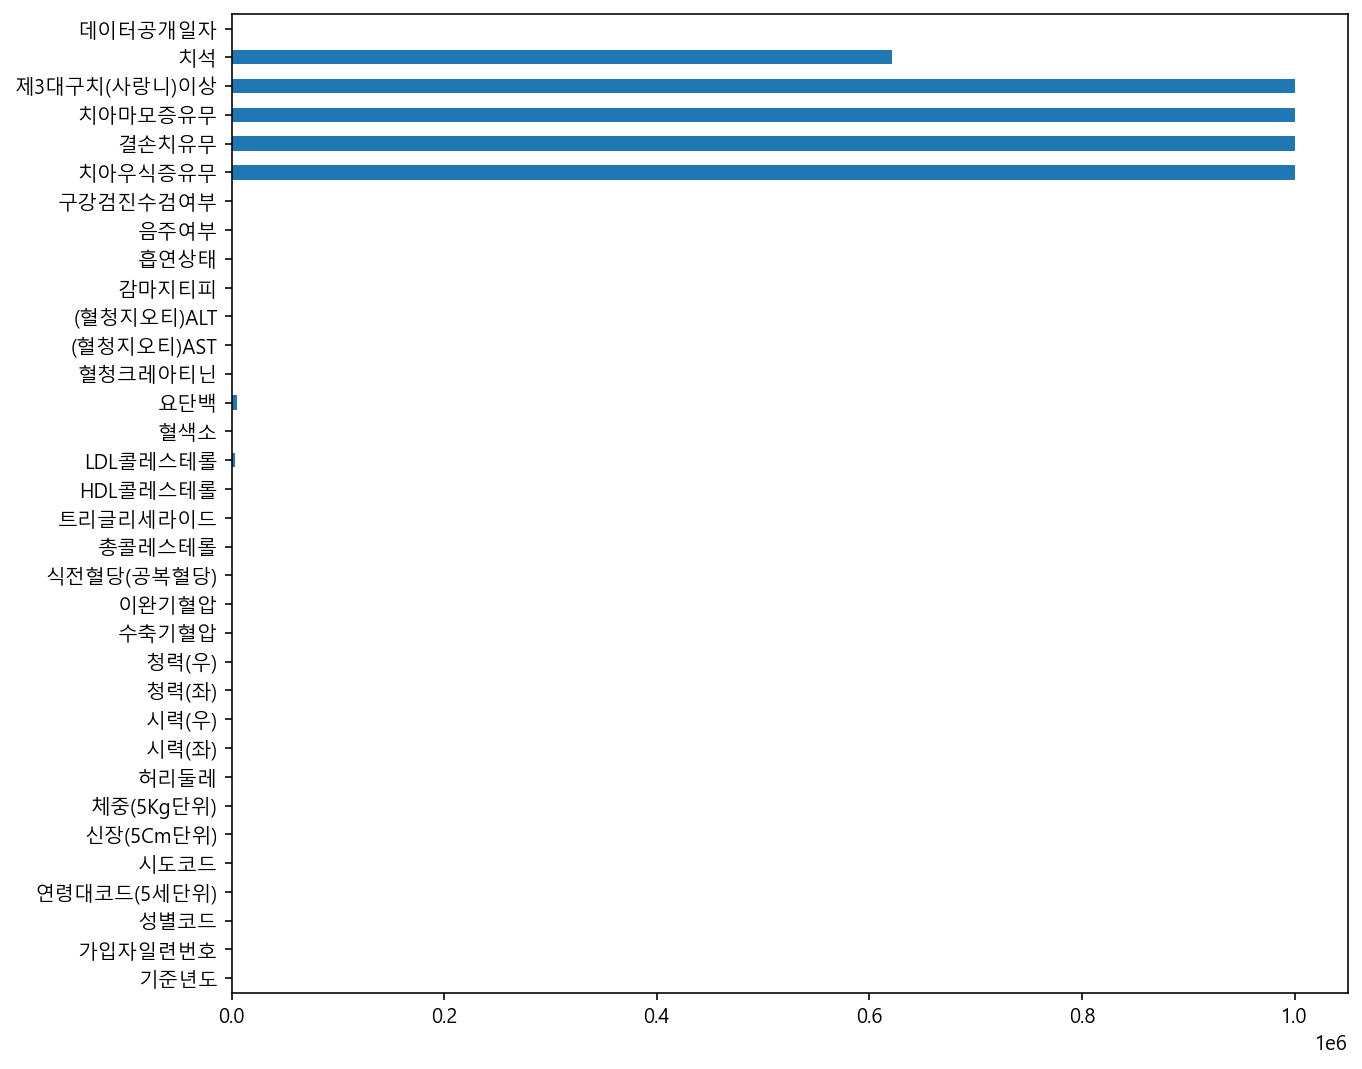

In [8]:
df.isnull().sum().plot.barh(figsize=(10, 9))

## 일부 데이터 요약하기

In [9]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0


In [10]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


## value_counts 로 값 집계하기

In [11]:
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [12]:
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

## groupby 와 pivot_table 사용하기
### groupby

In [13]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [14]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [15]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [16]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [17]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

### pivot_table
* pivot : 연산 없이 데이터의 형태만 변형
* pivot_table : 연산을 하고자 할 때

In [18]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
N,500439
Y,499025


In [19]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
N,26.819650,19.0
Y,47.588675,30.0


In [20]:
pd.pivot_table(df, index=["성별코드","음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    N     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     Y     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    N     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     Y     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

* 차이점 
    * groupby : 속도가 조금 더 빠르다
    * pivot_table : 조금 더 직관적

## 전테 데이터 시각화 하기

* 데이터를 시각화 할 때는 groupby 혹은 pivot_table을 한 후 수행( 속도 )

### 히스토그램

* 수치데이터를 bin의 개수 만큼 그룹화 해서 도수분포표를 만들고 시각화 


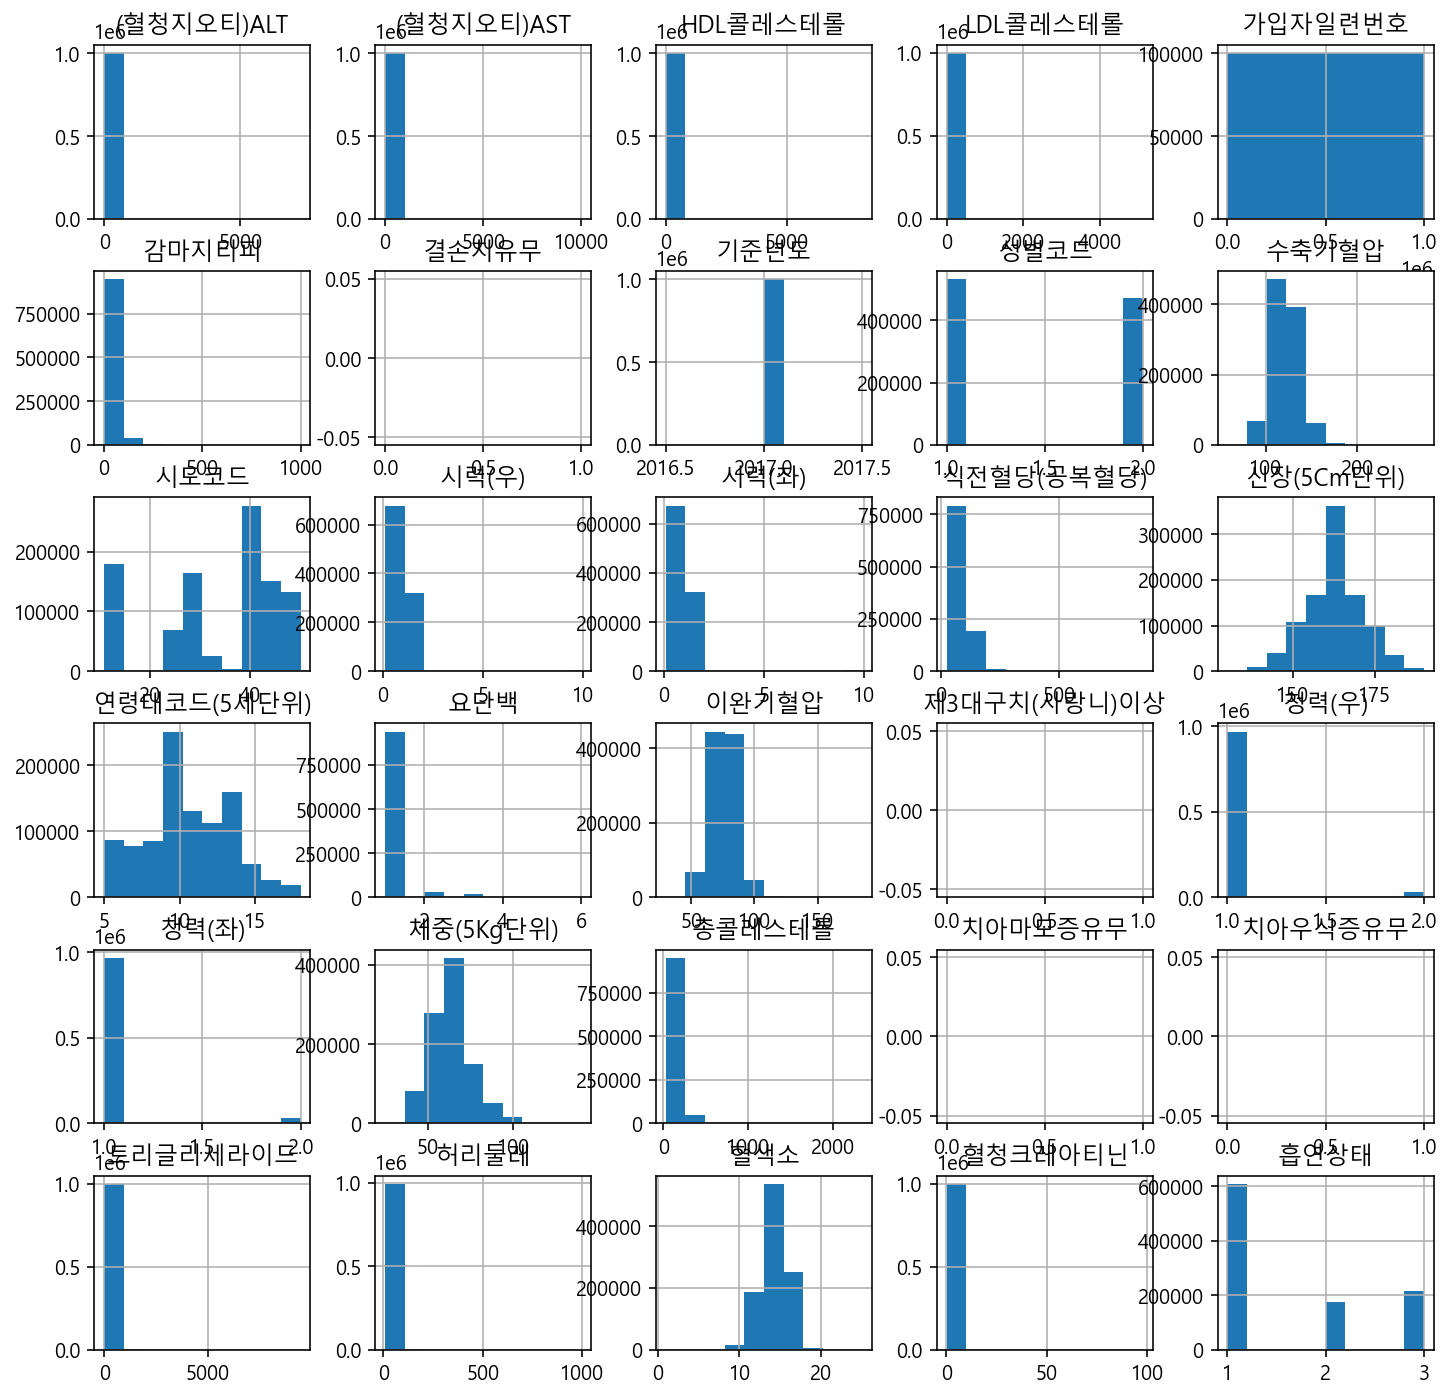

In [21]:
h = df.hist(figsize=(12, 12))

### 슬라이싱을 사용해 히스토그램 그리기
* iloc : 인덱스의 순서대로 슬라이싱이 가능
* iloc[행, 열], 전체데이터 = [ : , : ]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DD3E7A6DF0>,
      dtype=object)

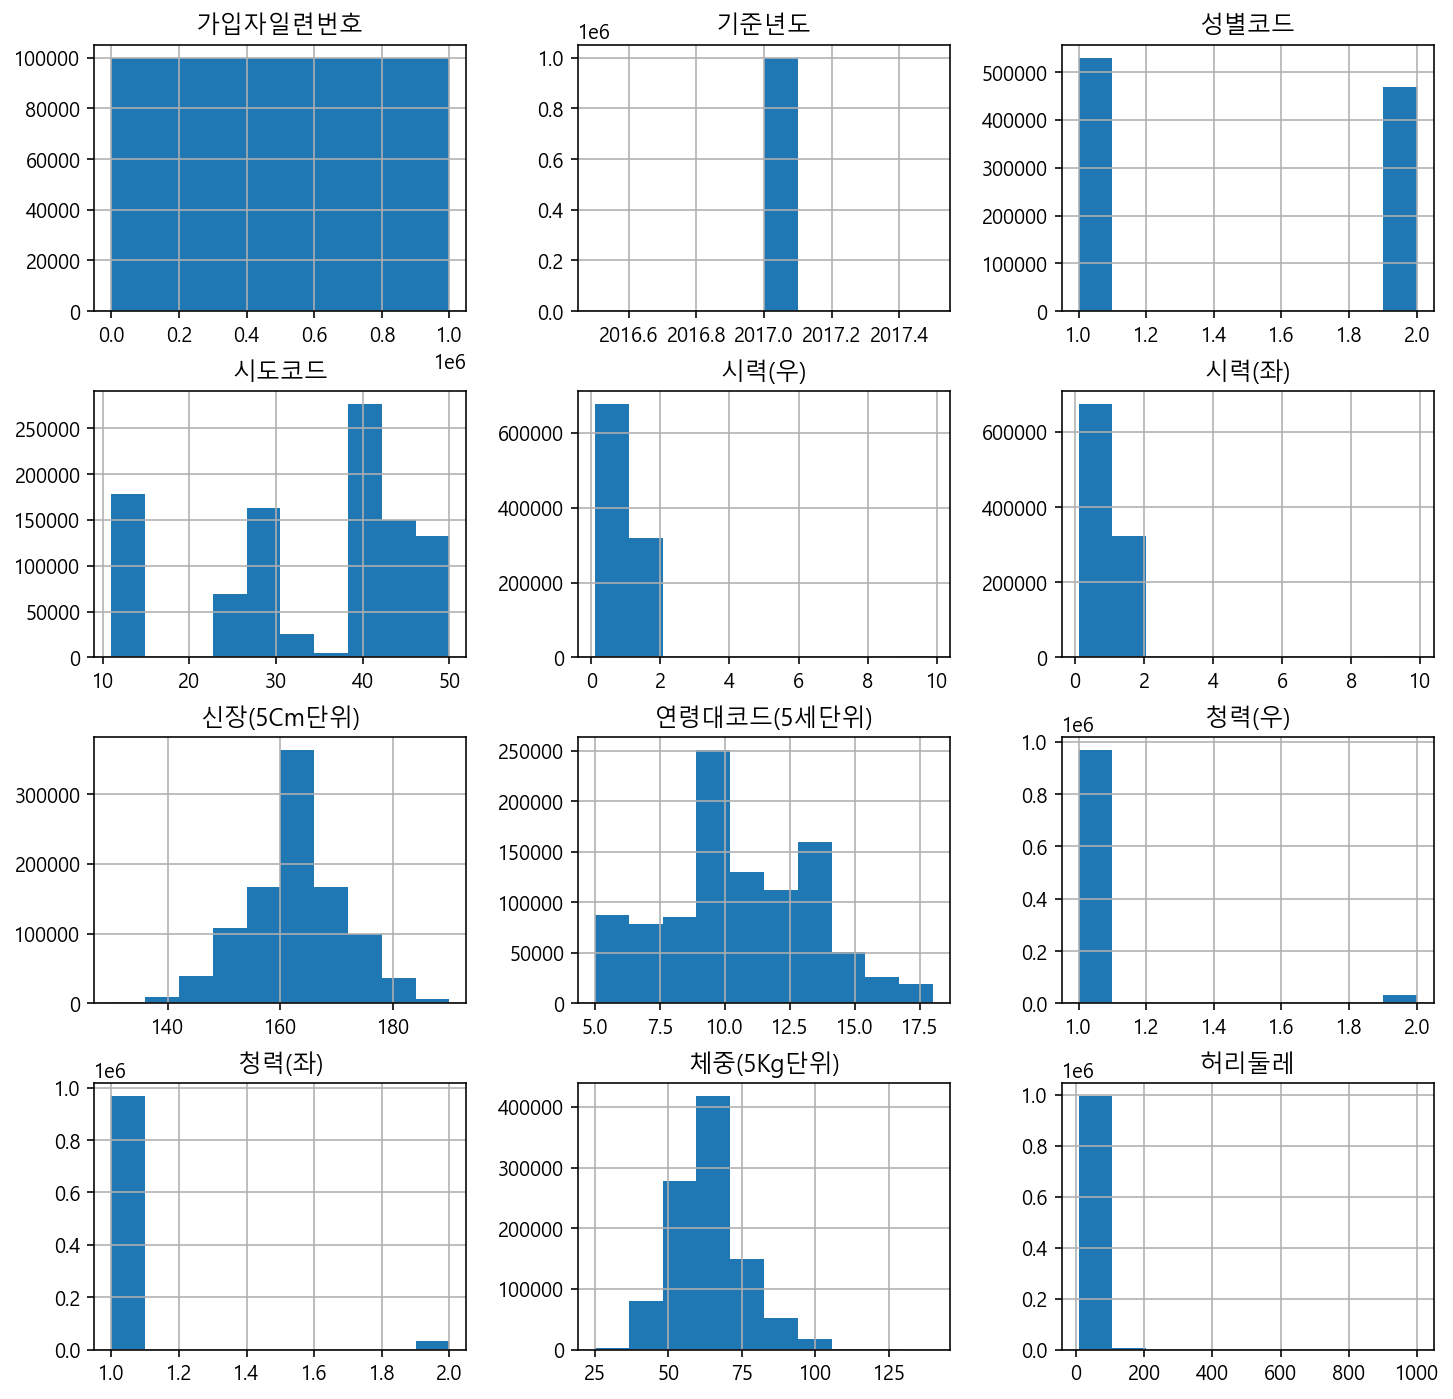

In [22]:
df.iloc[:, :12].hist(figsize=(12, 12))

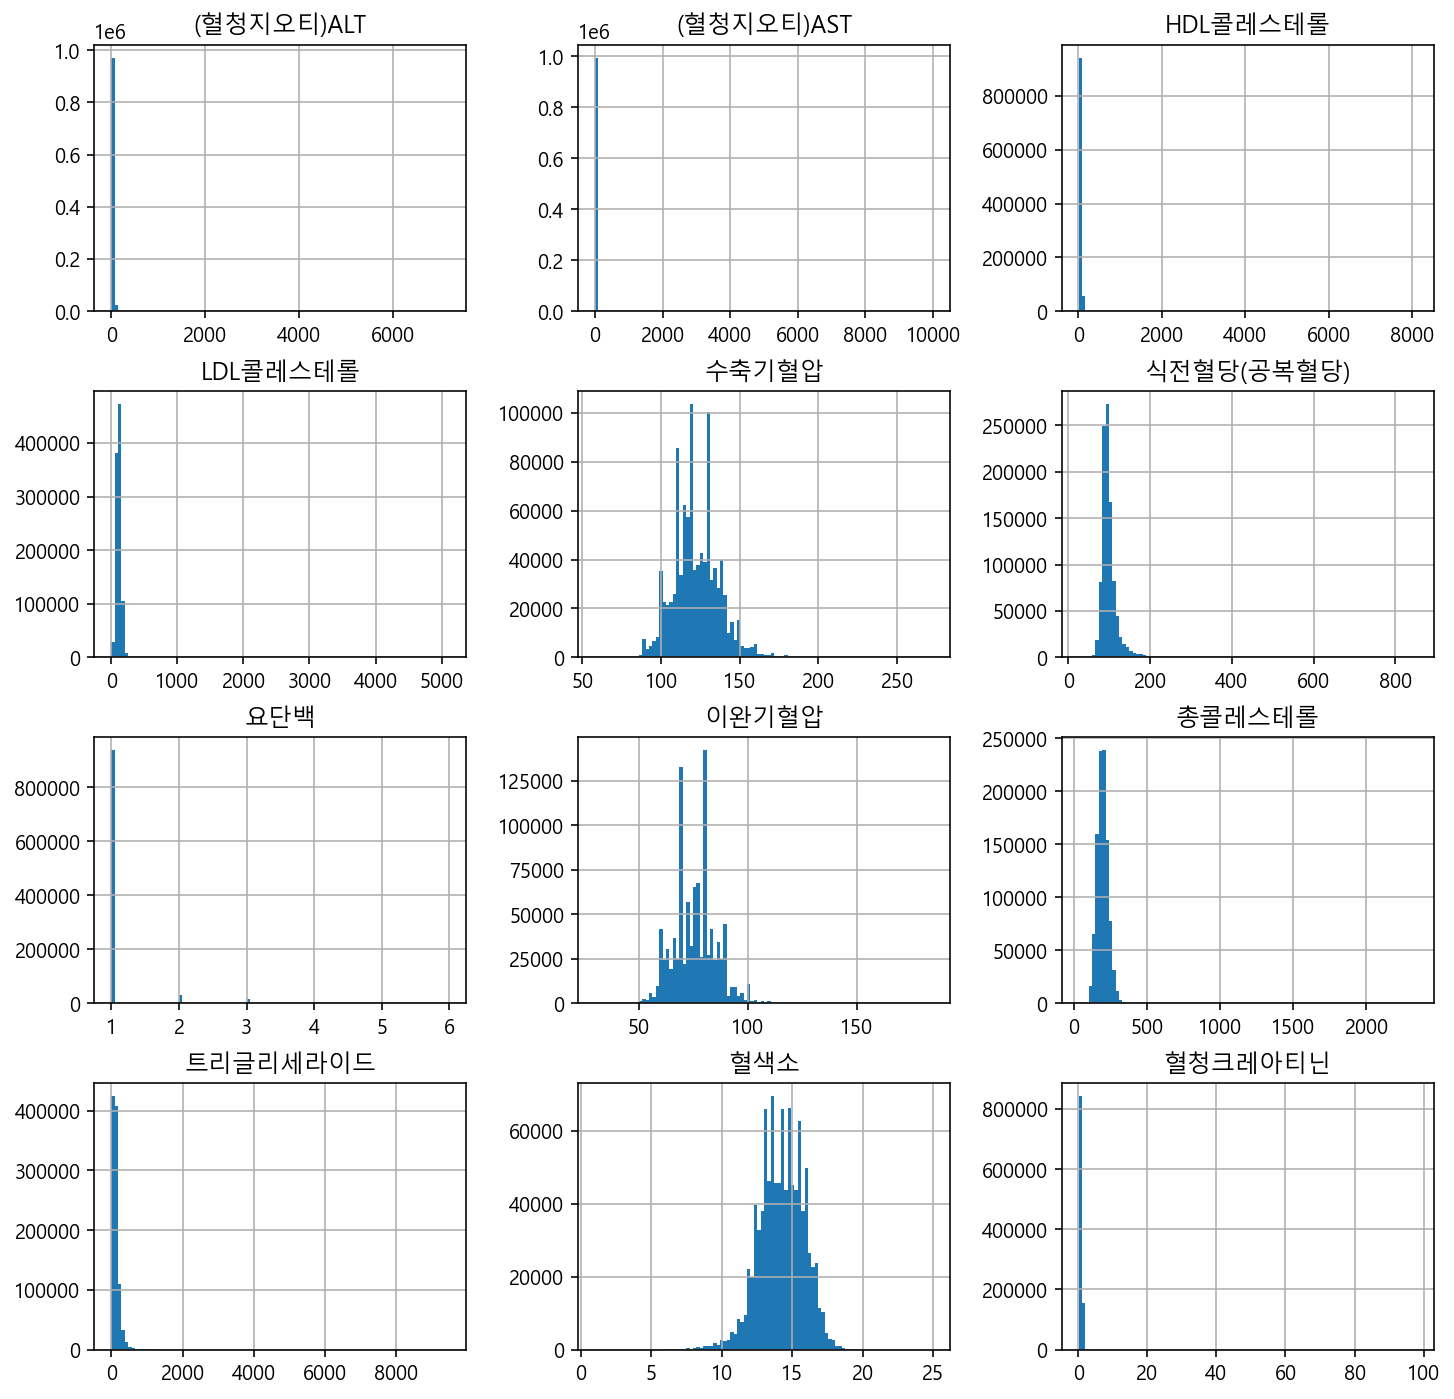

In [23]:
h = df.iloc[:,12:24].hist(figsize=(12, 12), bins=100)

## 샘플데이터 추출하기
* seaborn 의 속도 향상을 의해 일부 데이터만 샘플링해서 사용

In [24]:
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

## Seaborn 사용하기
* matplotlib을 사용하기 쉽게 만들어 짐
* 간단하게 고급 동계 연산을 할 수 있다

## 범주형(카테고리) 데이터 시각화
* countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다
* value_counts 로 구한 값을 시각화

### countplot - 음주여부

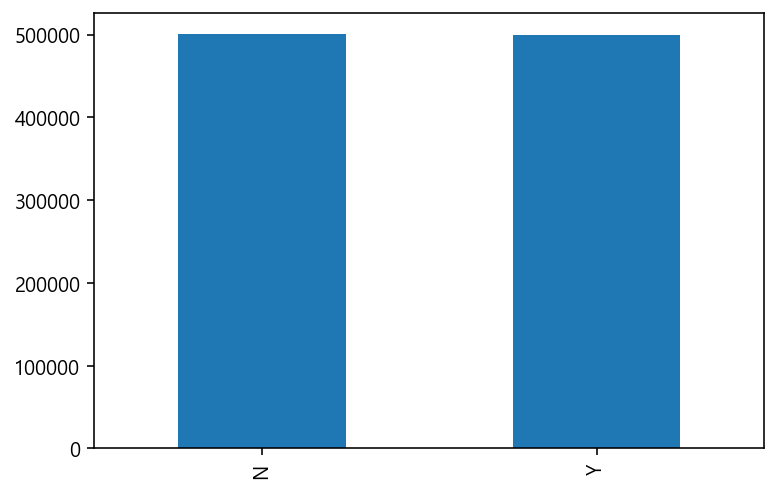

In [25]:
df["음주여부"].value_counts().plot.bar()

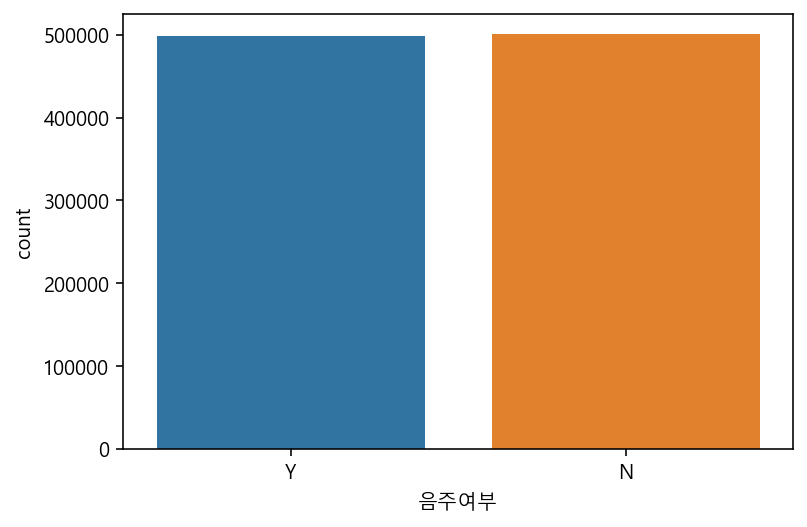

In [26]:
sns.countplot(x="음주여부", data=df)

### hue 옵션 사용하기

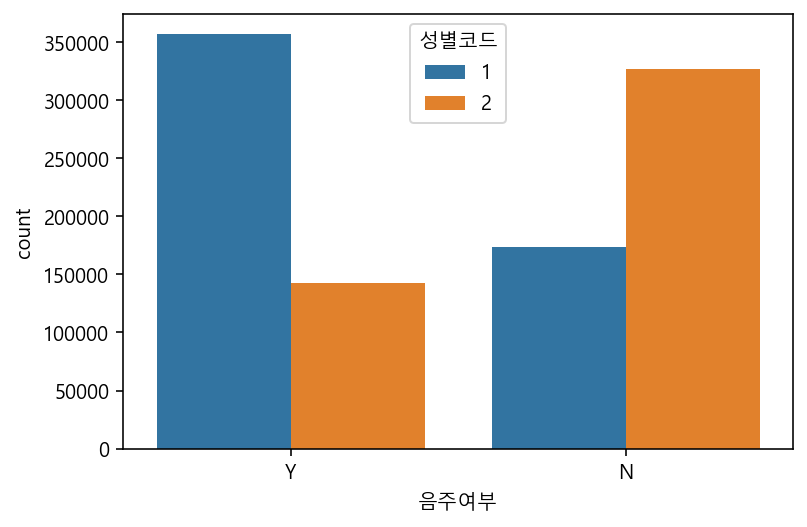

In [27]:
sns.countplot(x="음주여부", data=df, hue="성별코드")

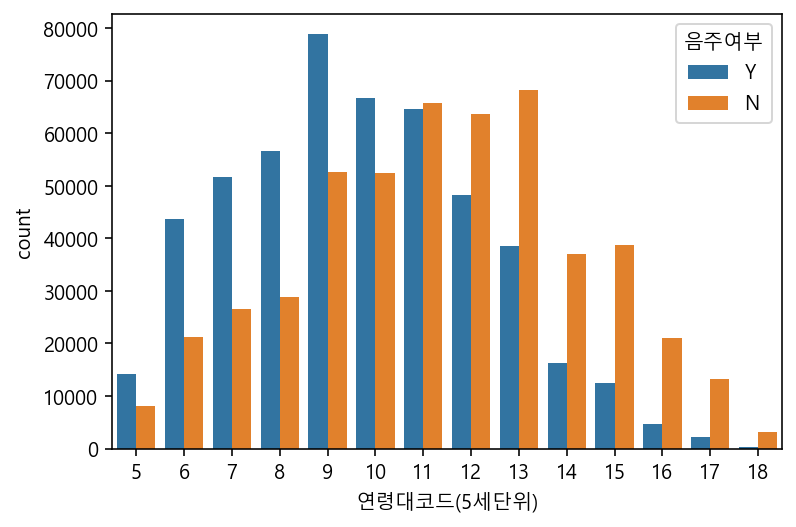

In [28]:
# 연령대별 음주여부 확인

sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

### countplot - 키와 몸무게
* 키, 몸무게 = 연속형 데이터
* 5kg, 5cm 단위로 묶여있다 => 범주형 데이터

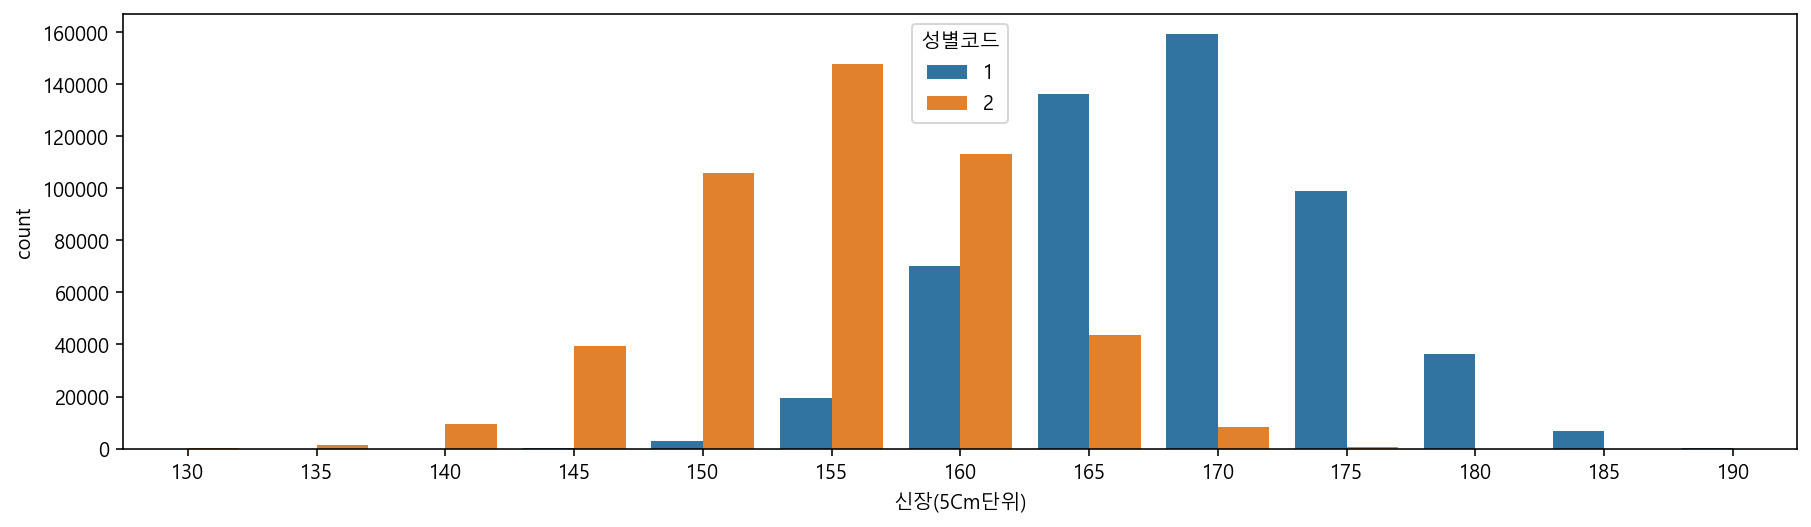

In [29]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

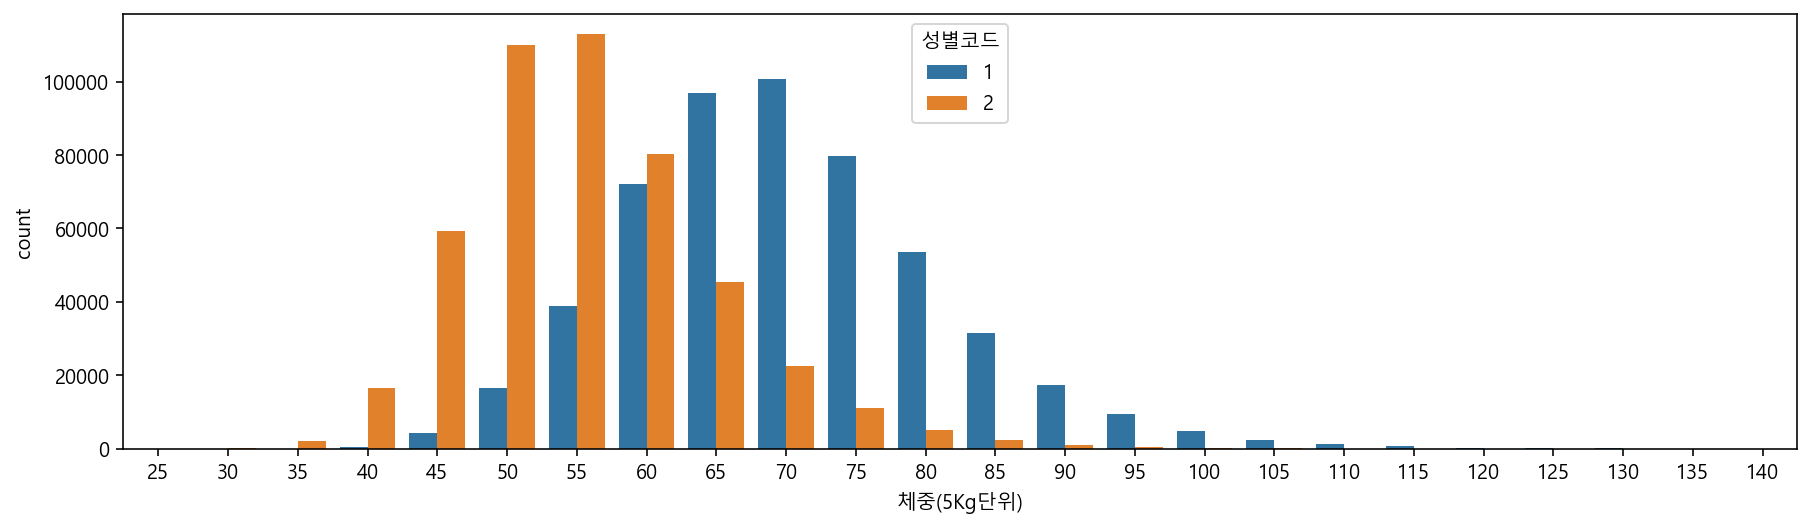

In [30]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

### barplot - 수치형 vs 범주형 데이터 시각화

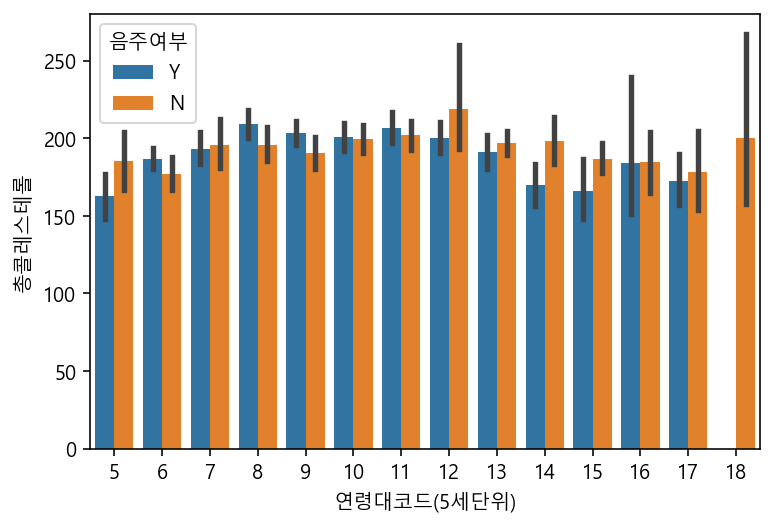

In [31]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

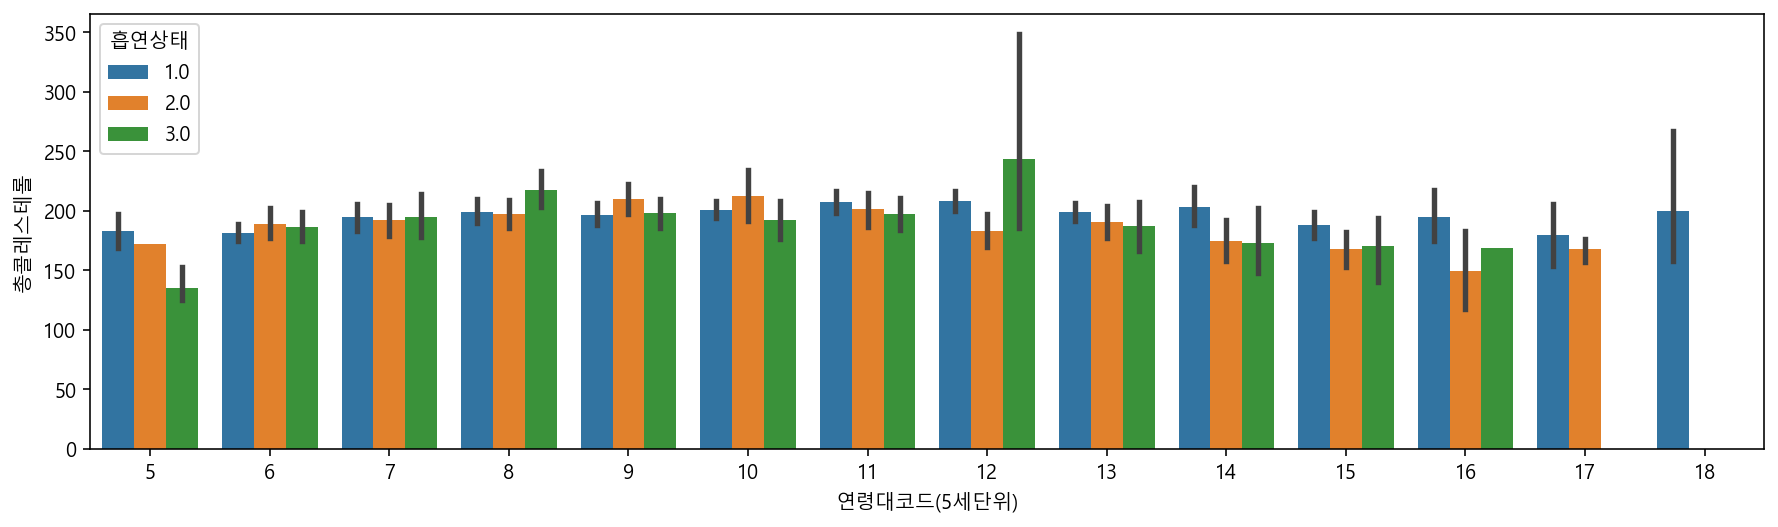

In [32]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")

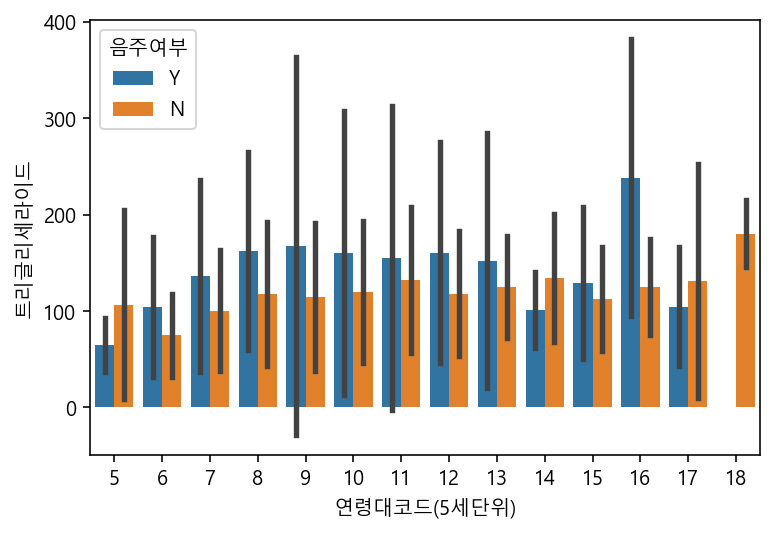

In [33]:
# 트리글리세라이드(중성지방)에 따른 연령대코드를 음주여부에 따라 barplot
# sd = 표준편차

sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부", ci="sd")

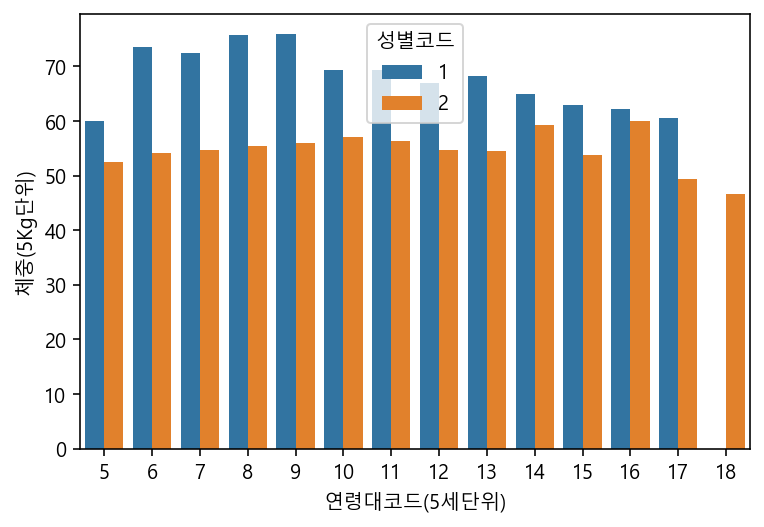

In [34]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci=None)

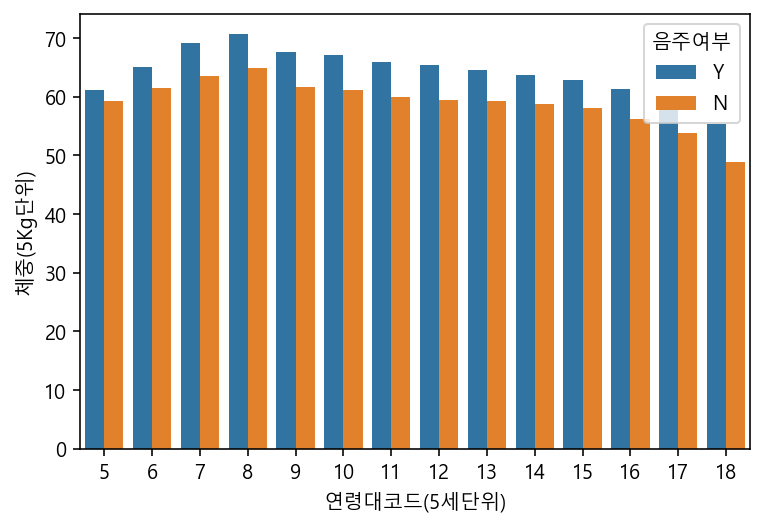

In [35]:
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci=None)

### lineplot and pointplot

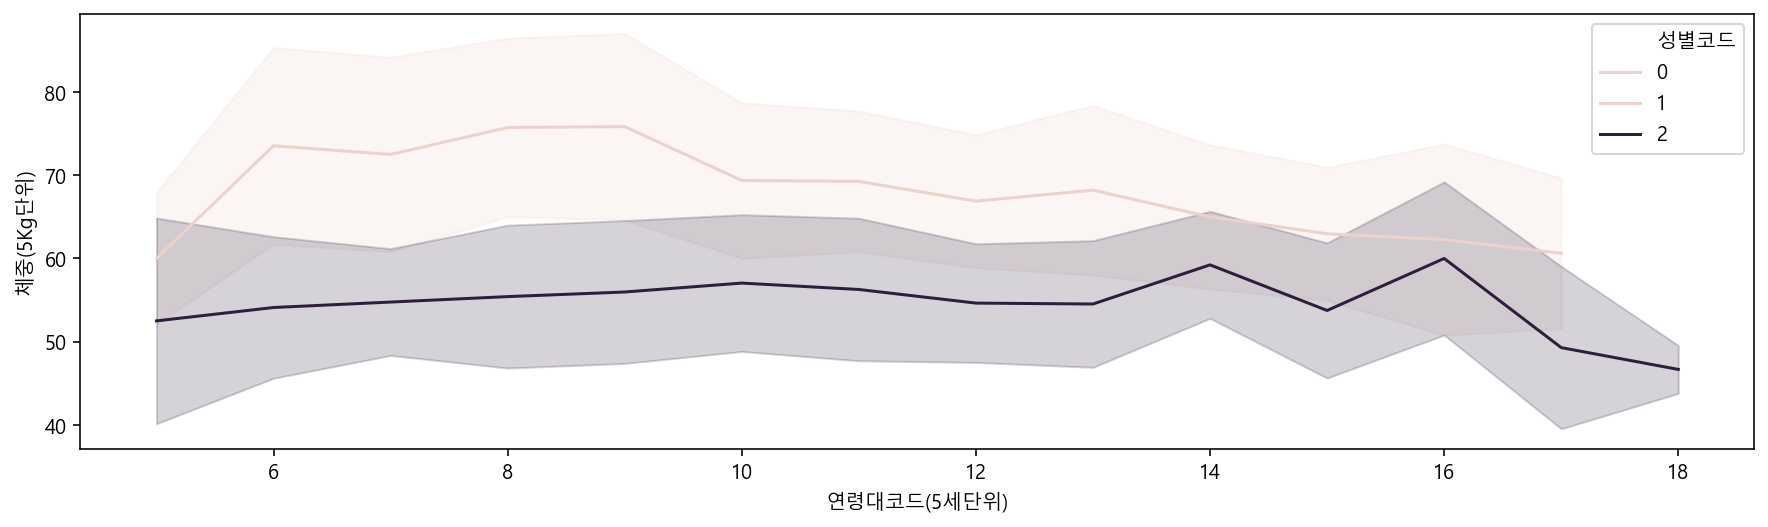

In [36]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci="sd")

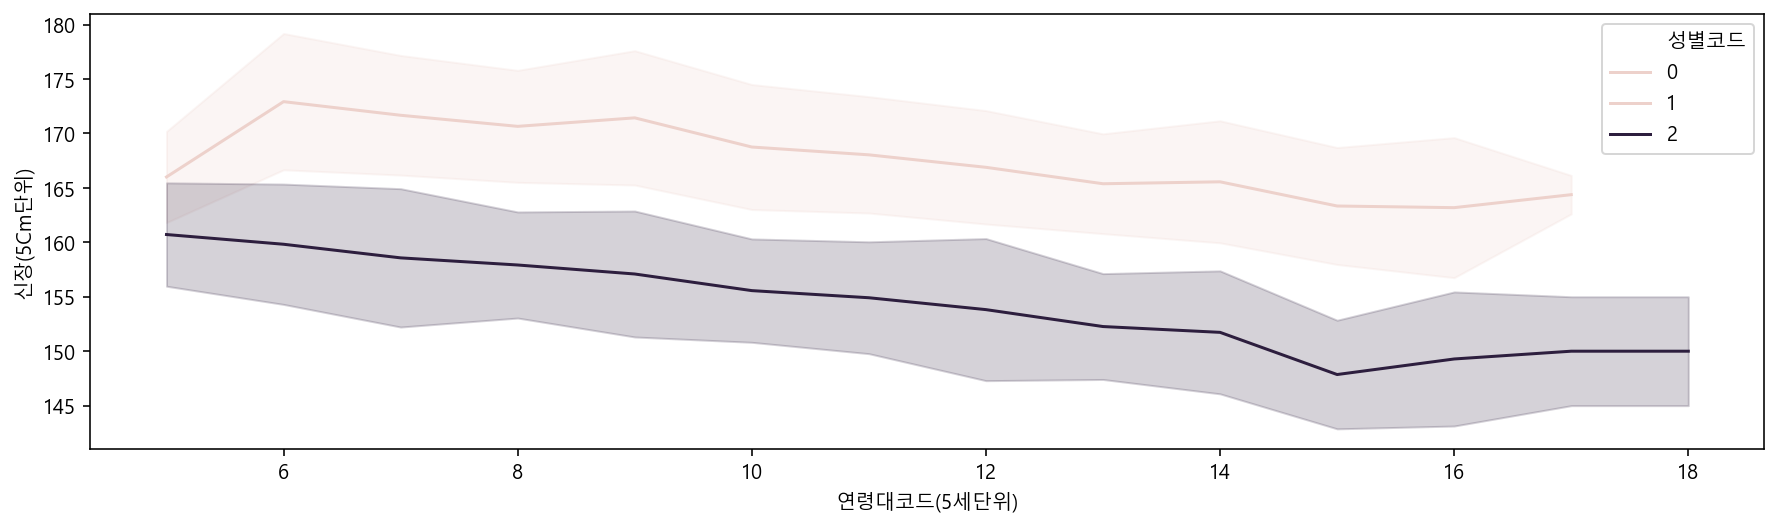

In [37]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

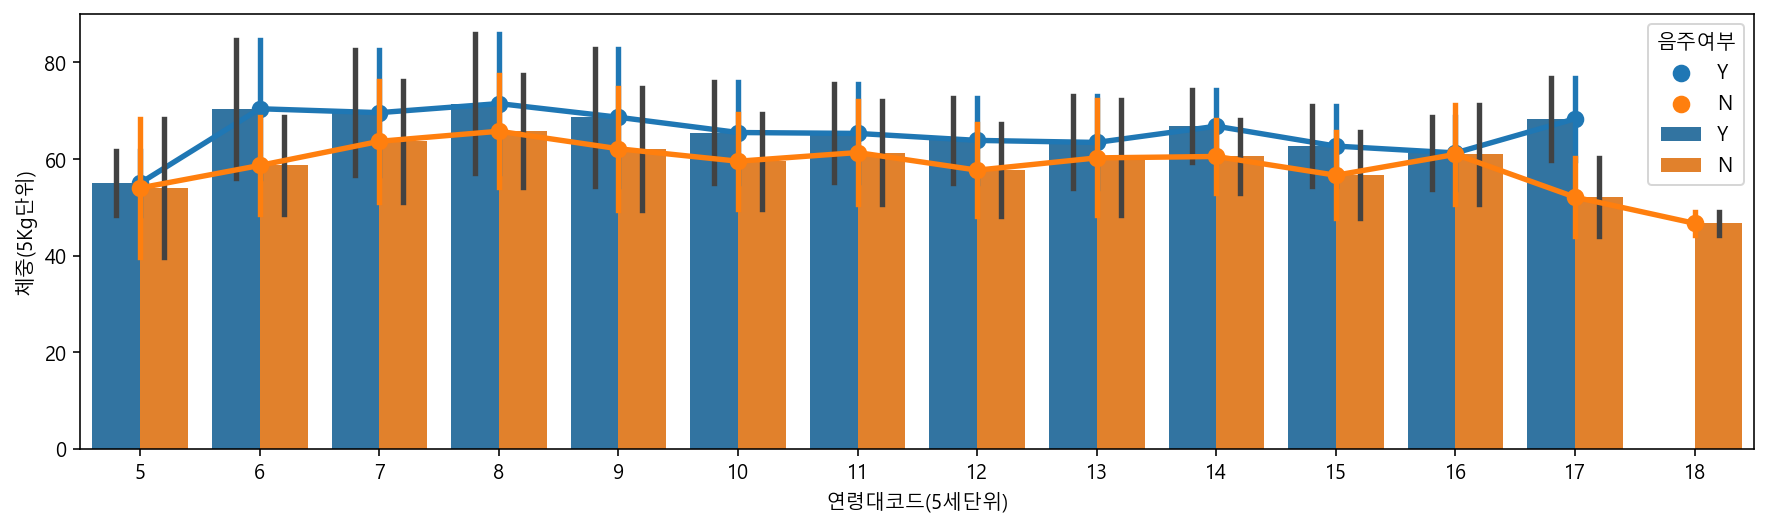

In [38]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부", ci="sd")

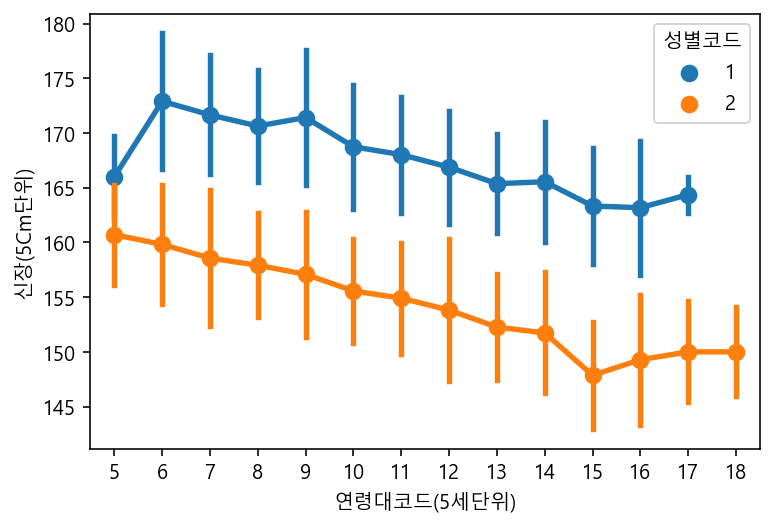

In [39]:
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")

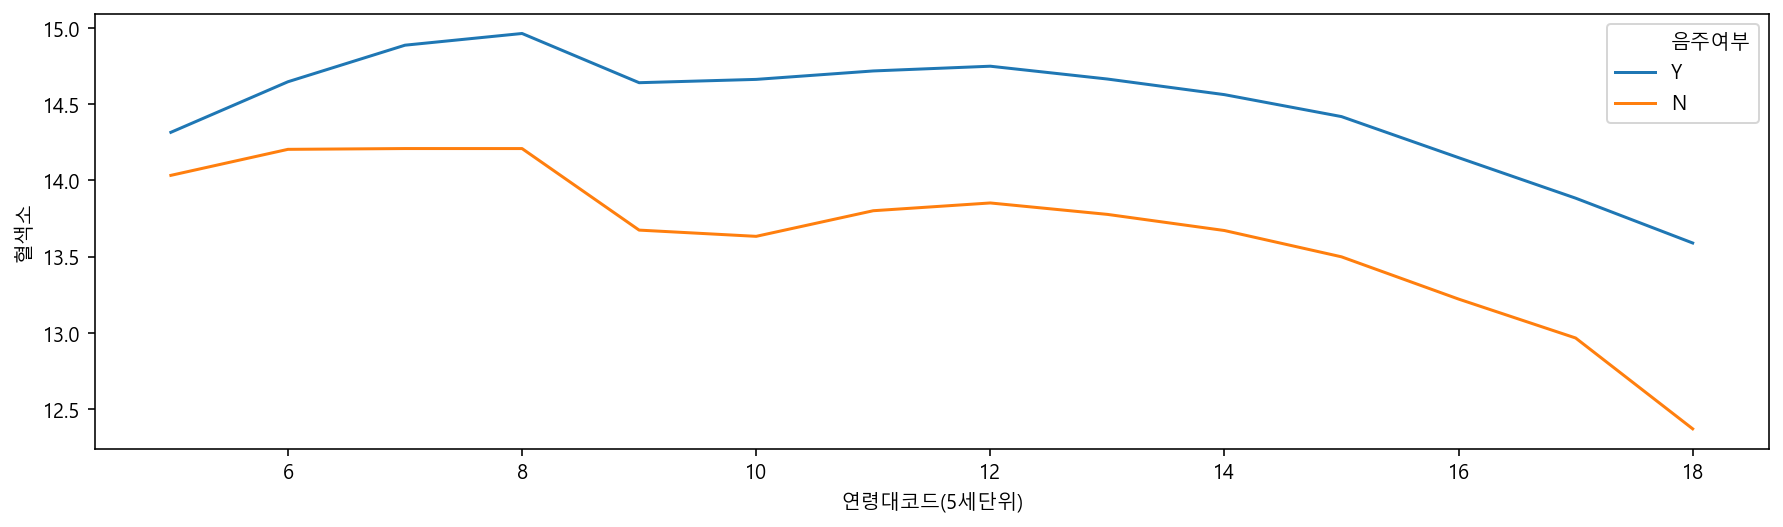

In [40]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

### boxplot
* 자료로 부터 얻어낸 통계량인 5가지 요약 수치로 시각화
    1. 최솟값
    2. 제 1사분위수
    3. 제 2사분위수 : 중앙값
    4. 제 3사분위수
    5. 최댓값
  
* 이상치 발견에 유리

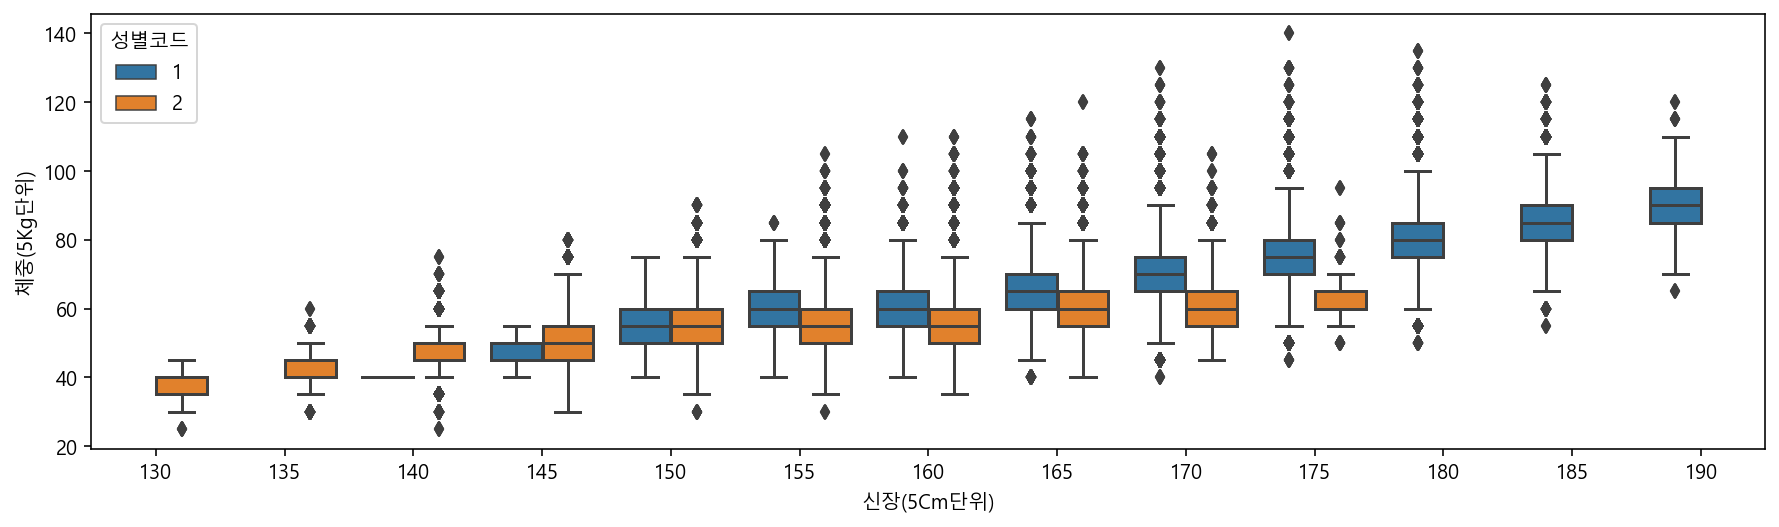

In [41]:
# ◆ = 이상치

plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")

### violinplot

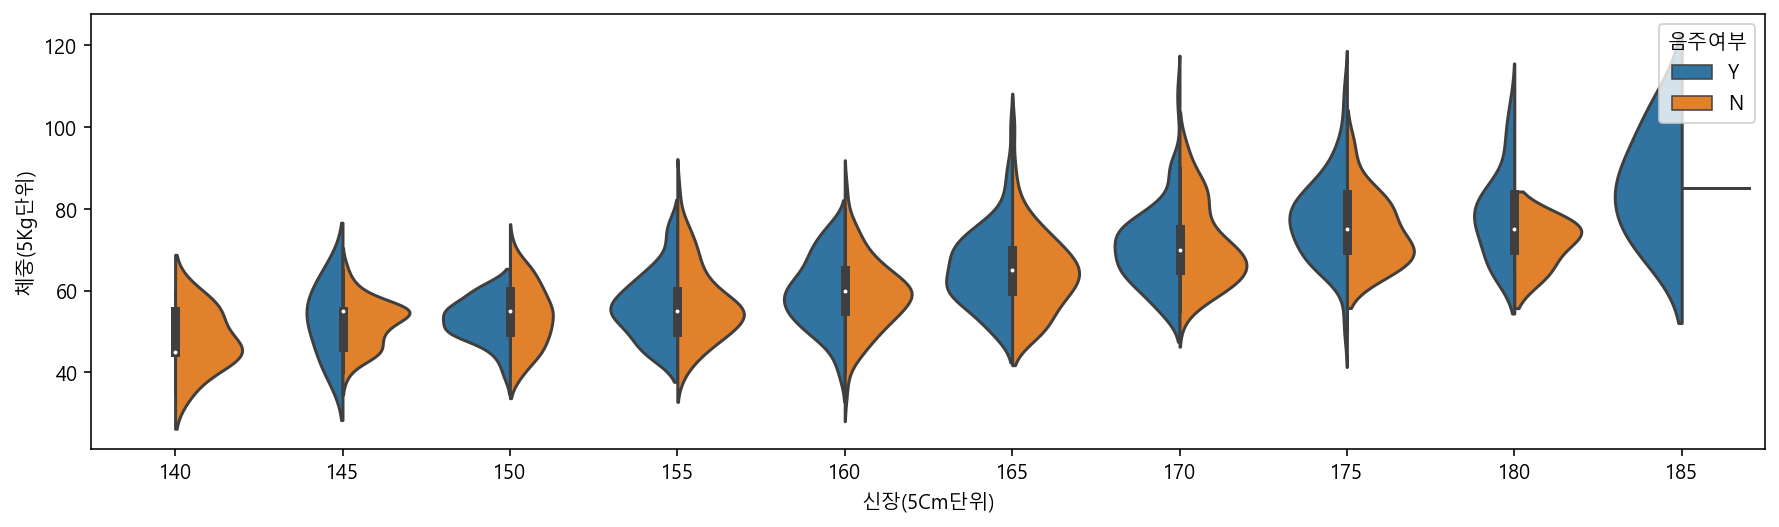

In [42]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", split=True)

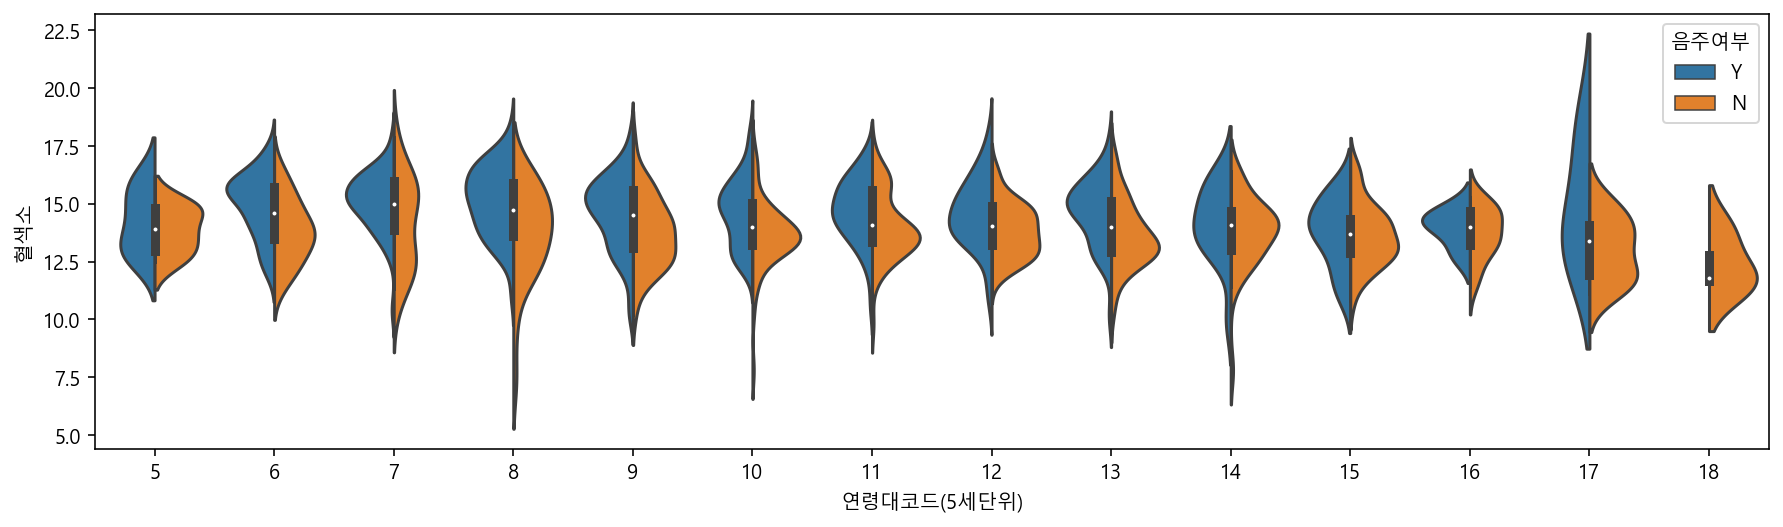

In [43]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

### swarm plot
* 범주형 데이터를 산점도로 시각화하고자 할 때

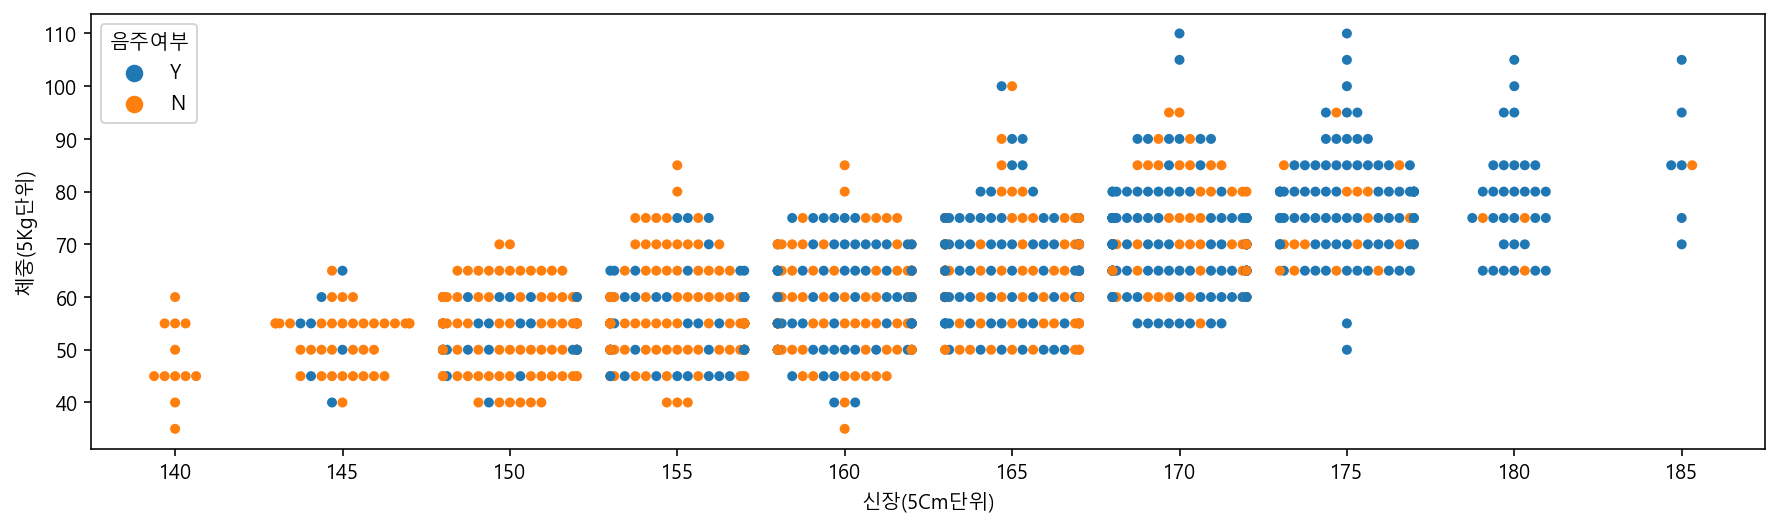

In [44]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

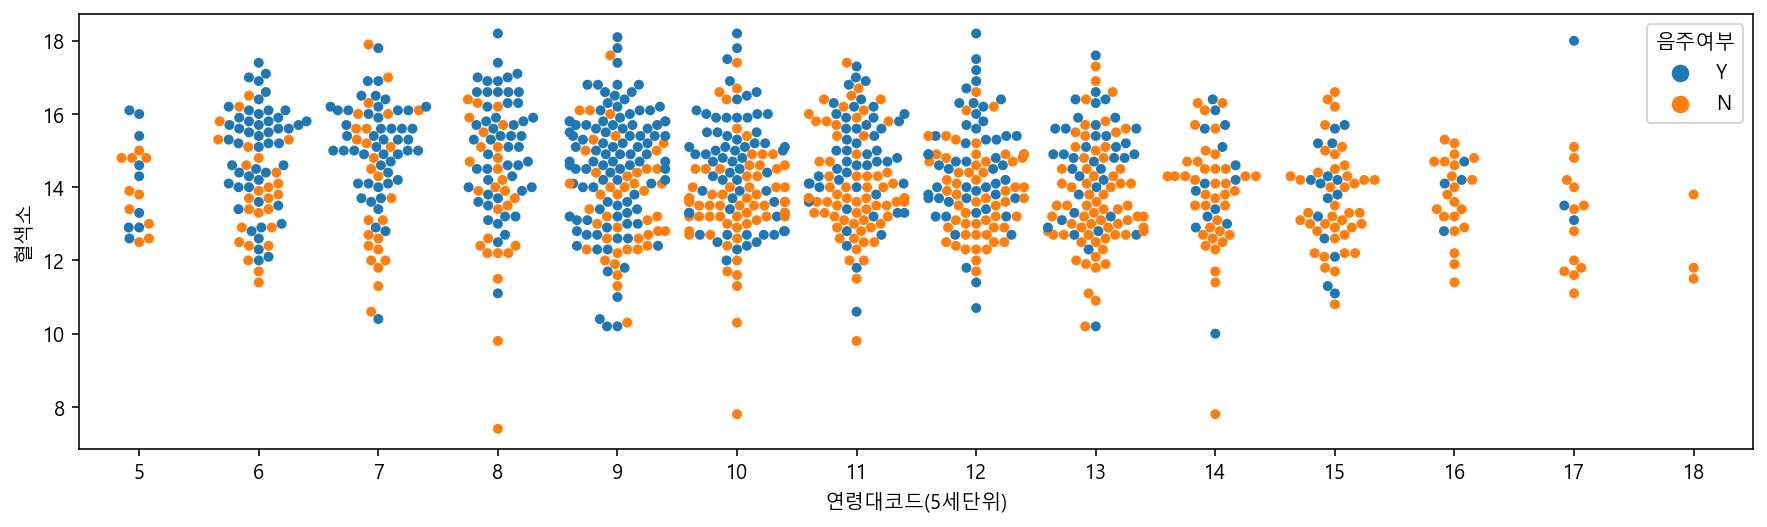

In [45]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

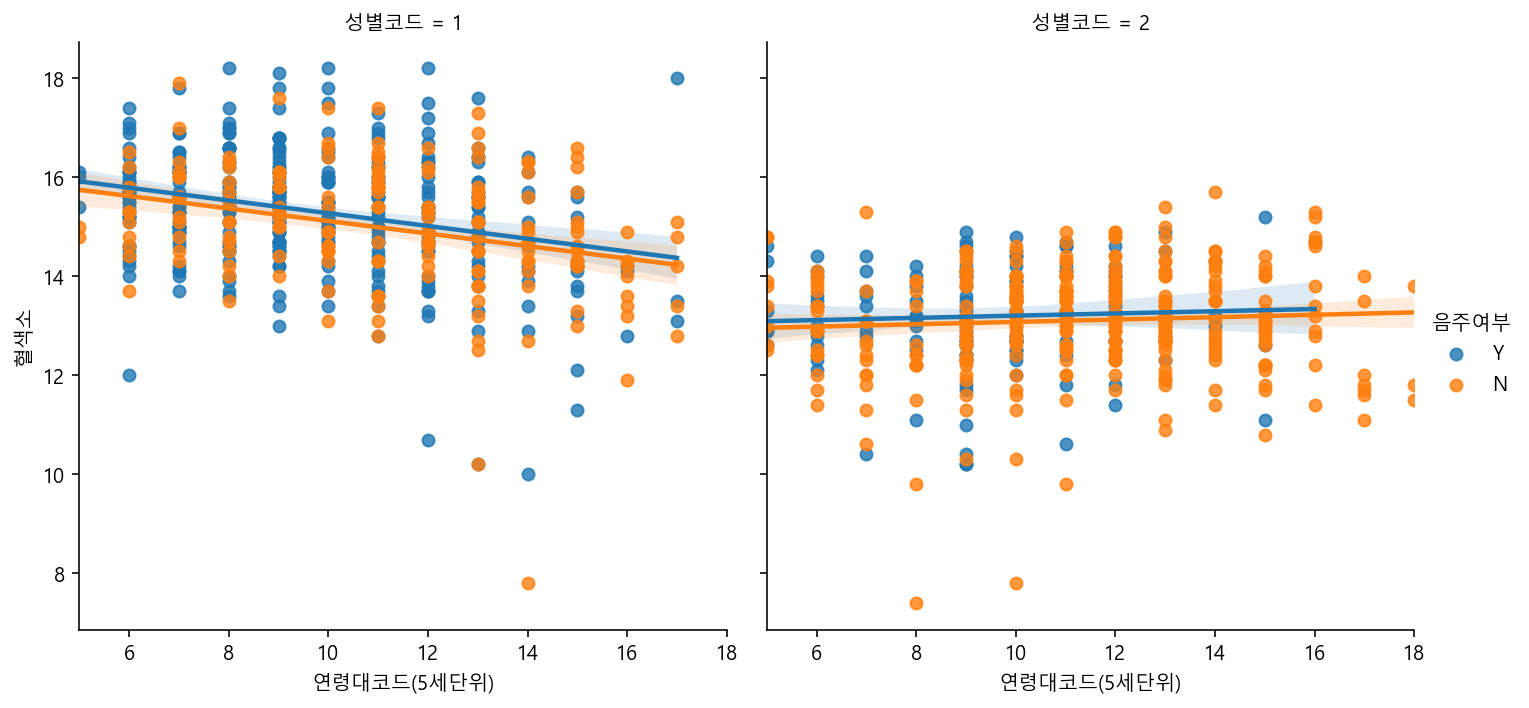

In [46]:
# lmplot : 회귀선 존재, 다변수 시각화에 유리
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")

## 수치형 데이터 시각화

### Scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관관계

* 점의 크기를 데이터의 수치에 따라 다르게 시각화 가능

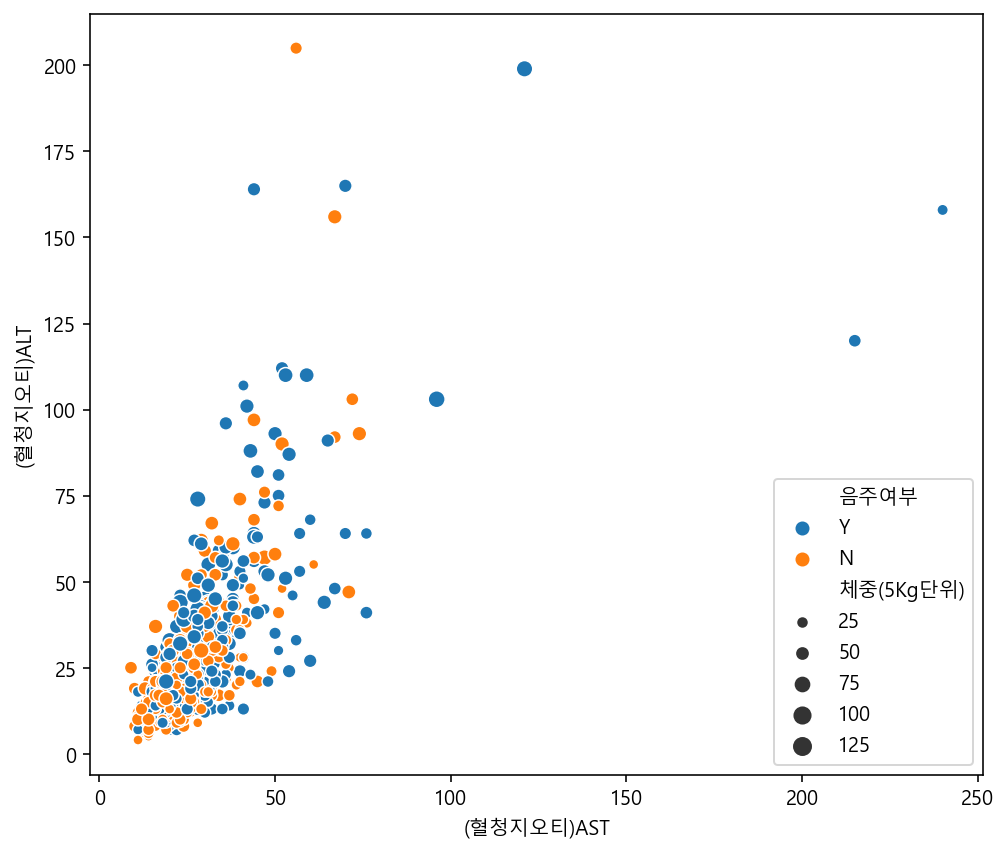

In [47]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부",
               size="체중(5Kg단위)")

### lmplot - 상관 관계를 보기

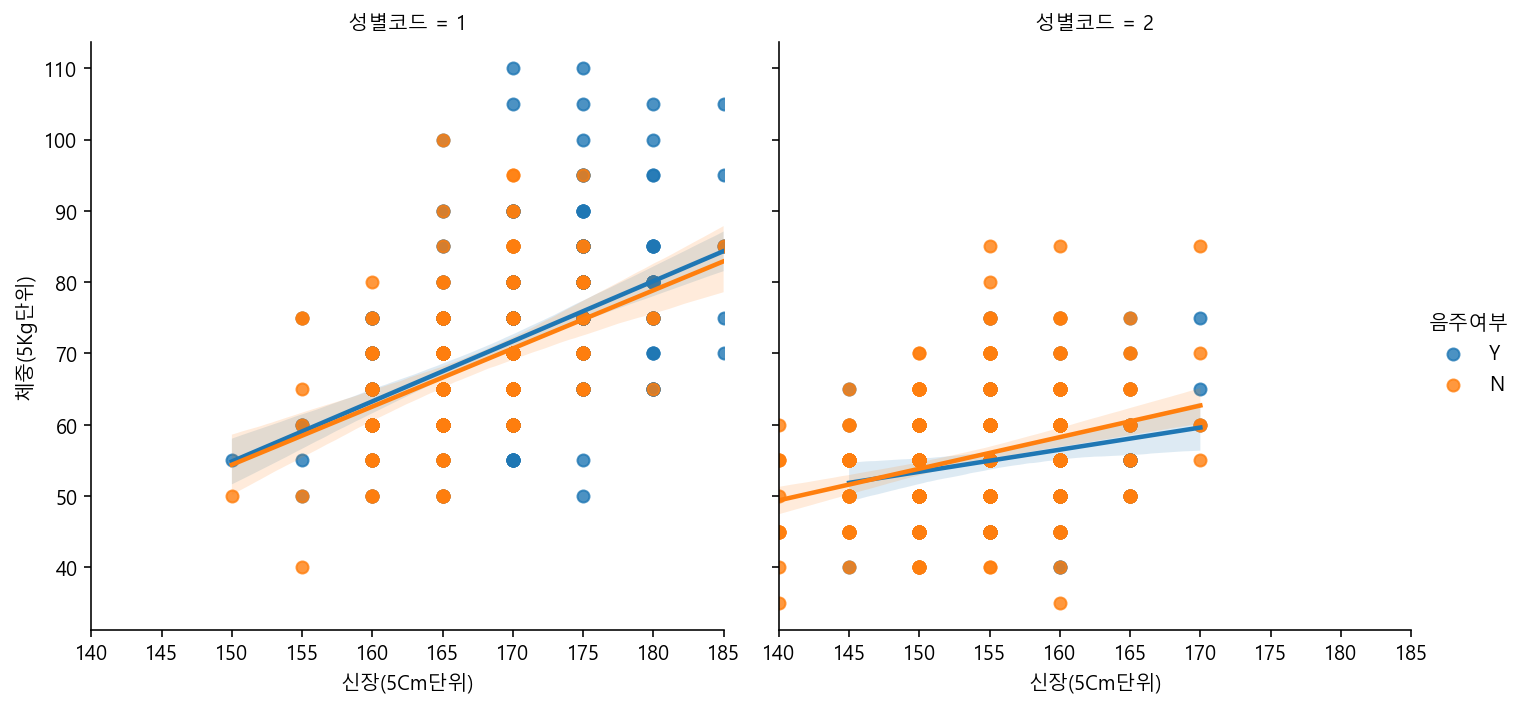

In [48]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)",  hue="음주여부", col="성별코드")

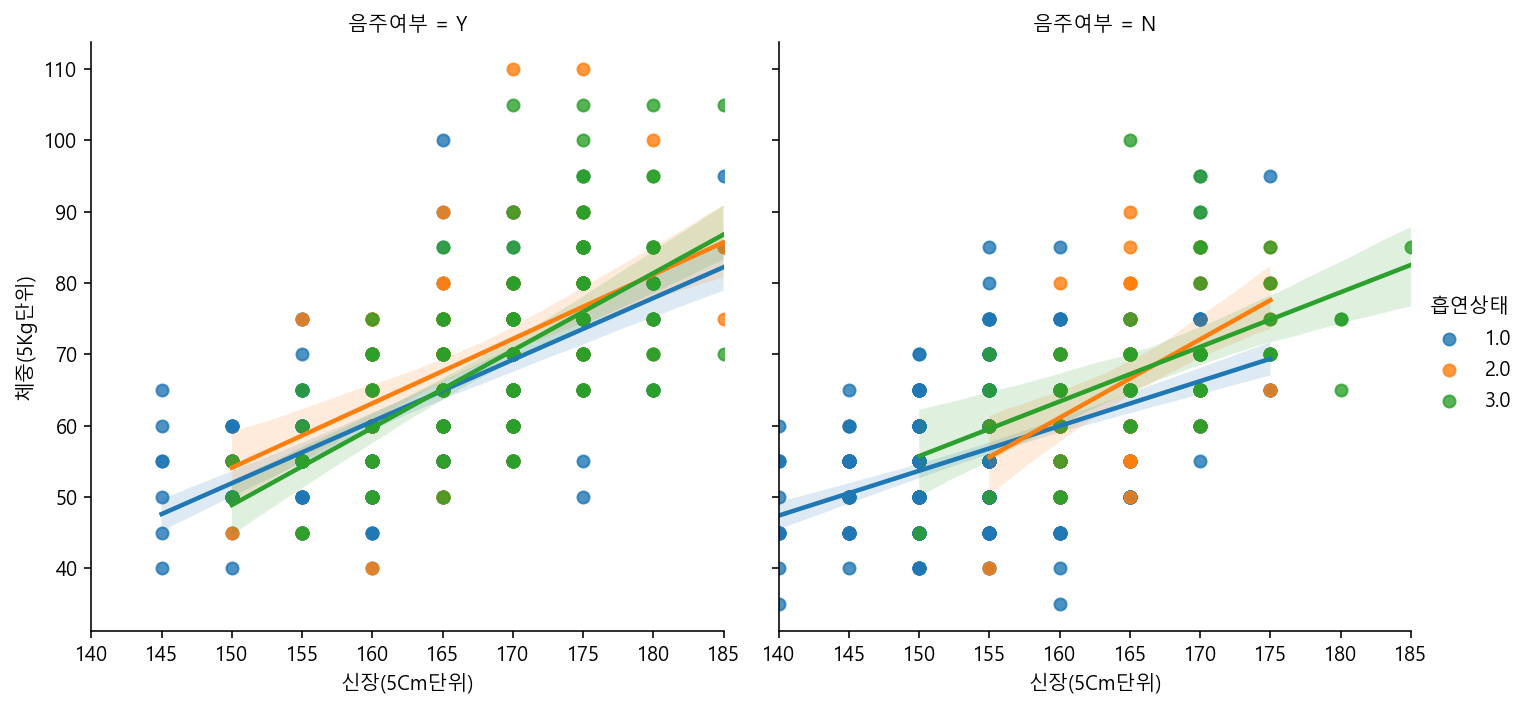

In [49]:
sns.lmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="흡연상태", col="음주여부")

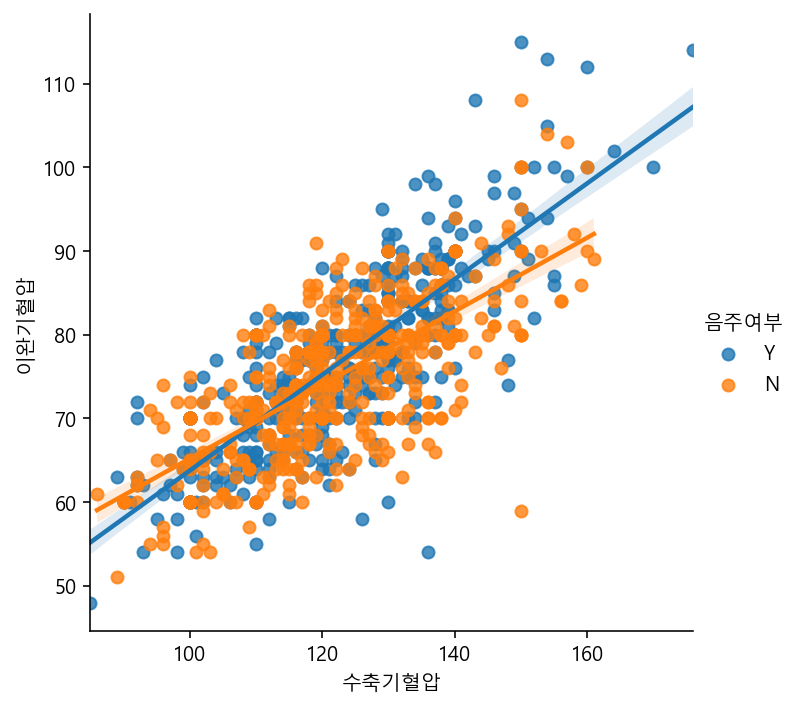

In [50]:
sns.lmplot(data=df_sample, x="수축기혈압", y="이완기혈압", hue="음주여부")

전날 과음을 하거나 몸이 피곤하면 일시적으로 AST와 ALT 수치가 정상치를 웃돌 수 있으므로 한 번의 검사로 간질환 여부를 판단하는 경우는 드무나, 간의 상태를 1차적으로 파악하는데 아주 중요한 기준이 된다

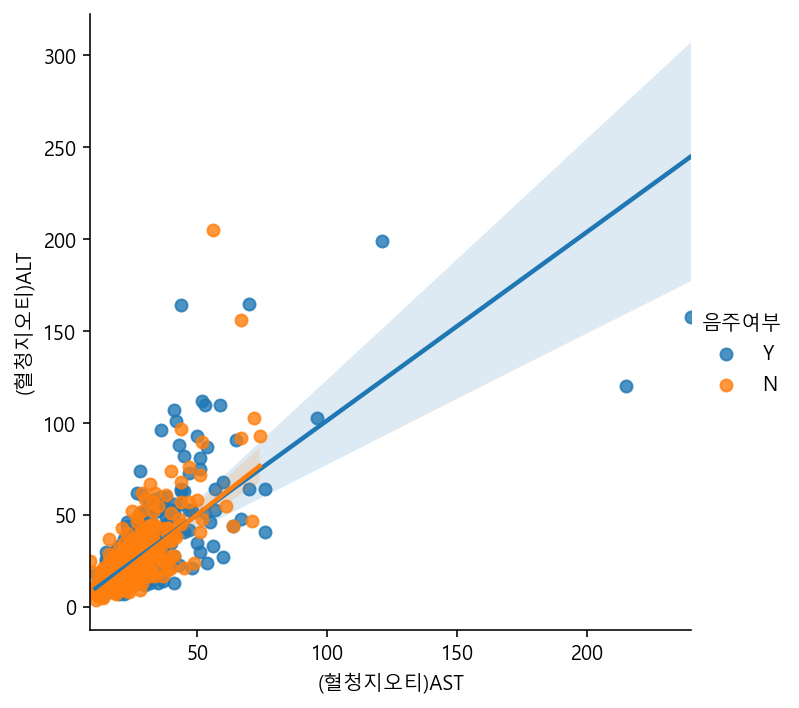

In [51]:
sns.lmplot(data=df_sample, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", robust=True)

### 이상치 다루기
* 이상치가 있으면 데이터가 자세히 보이지 않거나 회귀선이 변하기도 함
* 시각화를 통해 얻은 이상치를 제거하거나 따로 모아 보도록 합니다

In [52]:
df_ASLT= df_sample[(df_sample["(혈청지오티)AST"] < 400) & (df_sample["(혈청지오티)ALT"] < 400)]
df_ASLT

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
276826,2017,276827,1,12,41,160,55,77.0,0.9,0.9,...,38.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
849425,2017,849426,1,9,31,170,75,89.9,1.0,1.0,...,28.0,3.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
504499,2017,504500,1,8,42,170,75,86.3,1.5,1.5,...,121.0,3.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
601054,2017,601055,1,14,31,170,70,84.0,0.8,0.9,...,31.0,3.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
980221,2017,980222,1,17,41,160,60,86.0,0.7,0.5,...,28.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,2017,890014,2,8,41,155,80,98.0,0.2,0.2,...,39.0,1.0,N,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
875389,2017,875390,1,11,41,170,60,81.0,1.0,0.9,...,59.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
358458,2017,358459,1,9,11,170,90,101.0,1.2,1.2,...,41.0,2.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
808228,2017,808229,1,11,28,160,65,85.0,0.6,0.9,...,37.0,2.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


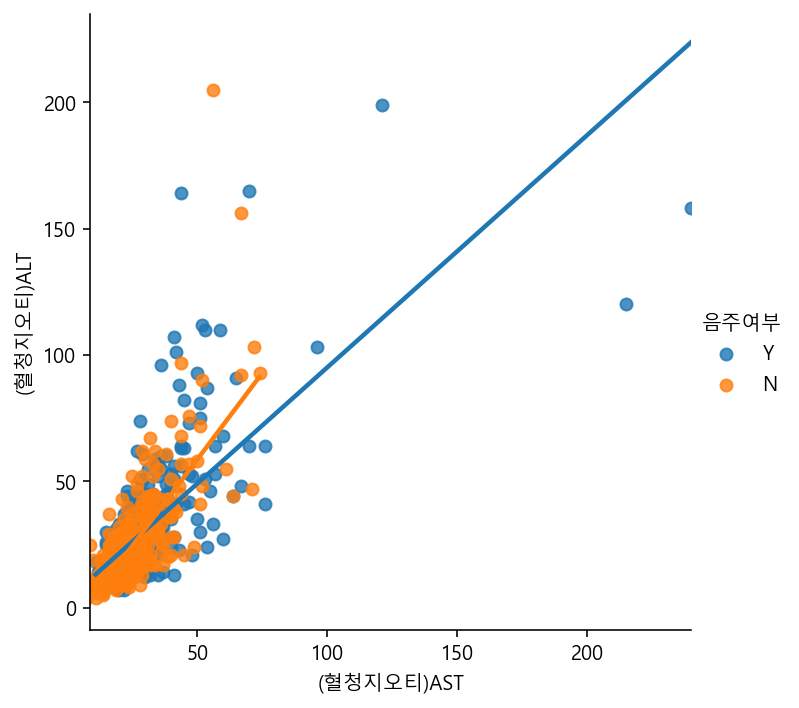

In [53]:
sns.lmplot(data=df_ASLT, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None )

In [54]:
df_ASLT_high = df[(df["(혈청지오티)AST"] > 400) | (df["(혈청지오티)ALT"] > 400)]
df_ASLT_high

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
4754,2017,4755,1,9,41,170,55,74.0,1.0,0.7,...,125.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
15820,2017,15821,2,13,45,150,55,83.0,0.6,1.2,...,999.0,1.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
17830,2017,17831,2,8,41,150,50,64.6,1.2,1.2,...,111.0,3.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
19949,2017,19950,1,6,41,170,105,103.0,1.0,1.2,...,133.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
26464,2017,26465,1,7,41,175,70,82.0,1.2,1.2,...,169.0,1.0,N,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982305,2017,982306,2,16,28,155,50,79.3,0.4,0.7,...,71.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
990867,2017,990868,2,11,41,145,45,75.0,0.9,1.2,...,279.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
991226,2017,991227,1,6,42,170,80,81.0,0.7,0.8,...,49.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
992747,2017,992748,2,10,41,165,40,58.0,0.9,0.7,...,777.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


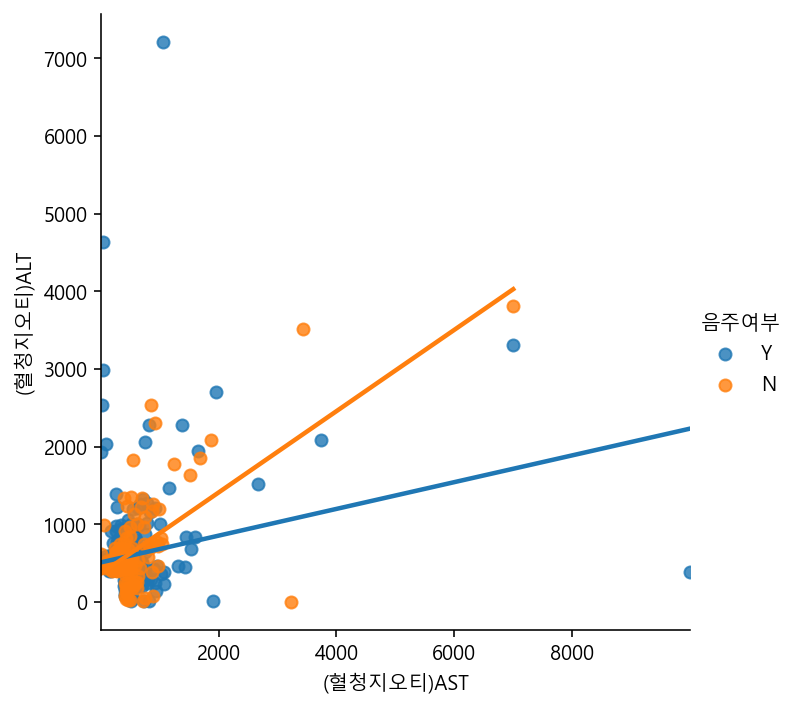

In [55]:
sns.lmplot(data=df_ASLT_high, x="(혈청지오티)AST", y="(혈청지오티)ALT", hue="음주여부", ci=None)

In [56]:
df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
541757,2017,541758,1,11,41,170,45,66.0,0.9,0.7,...,419.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


### displot
* 히스토그램
* 확률 밀도 함수  

In [57]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명 호출

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [58]:
# 결측치 제거
df_chol = df.loc[df["총콜레스테롤"].notnull(), "총콜레스테롤"]
df_chol.head()

0    193.0
1    228.0
2    136.0
3    201.0
4    199.0
Name: 총콜레스테롤, dtype: float64

In [59]:
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

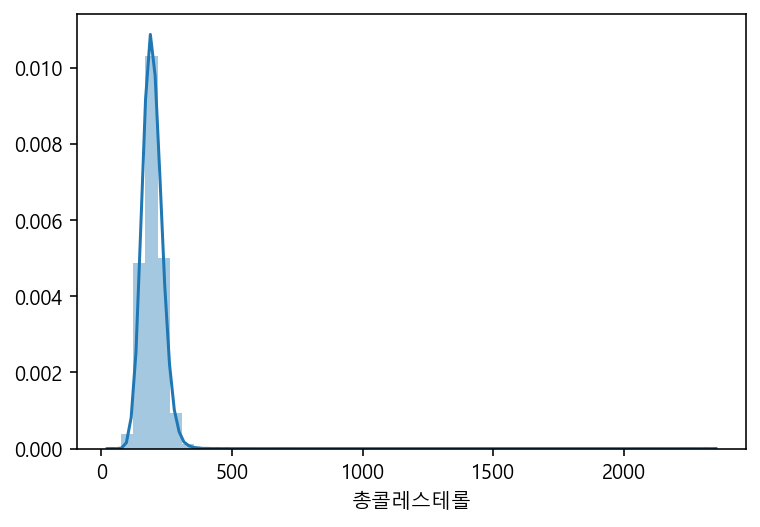

In [60]:
sns.distplot(df_chol)

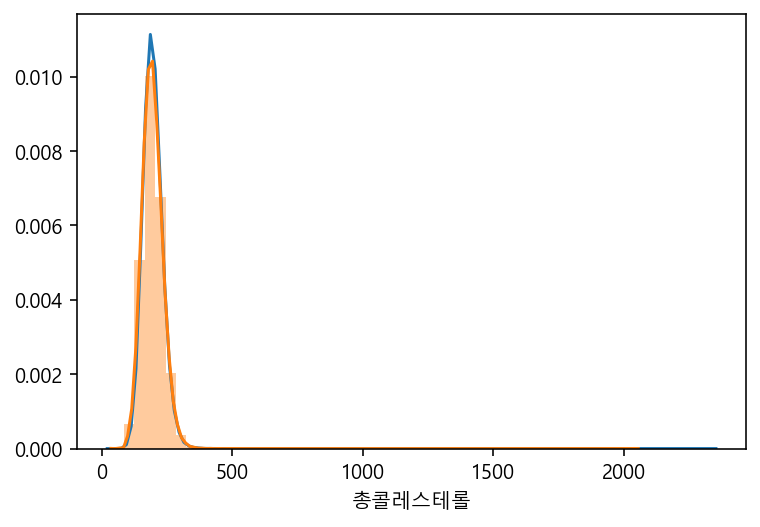

In [61]:
sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == "Y"), "총콜레스테롤"], hist=False)
sns.distplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == "N"), "총콜레스테롤"])

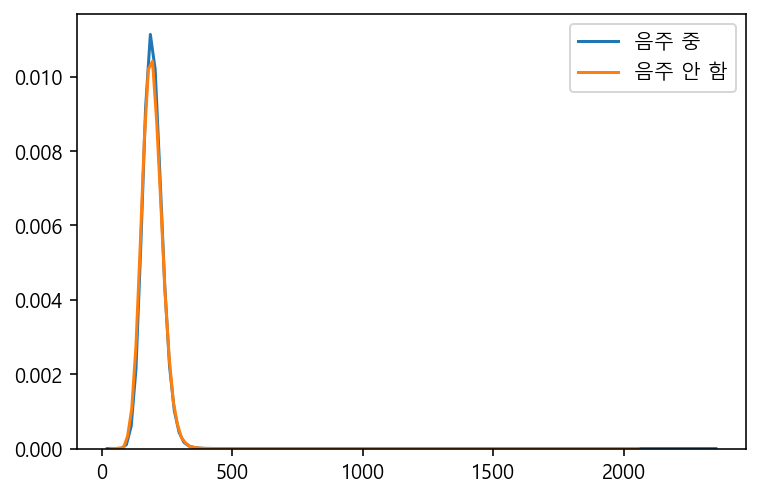

In [62]:
sns.kdeplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == "Y"), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df.loc[(df["총콜레스테롤"].notnull()) & (df["음주여부"] == "N"), "총콜레스테롤"], label="음주 안 함")

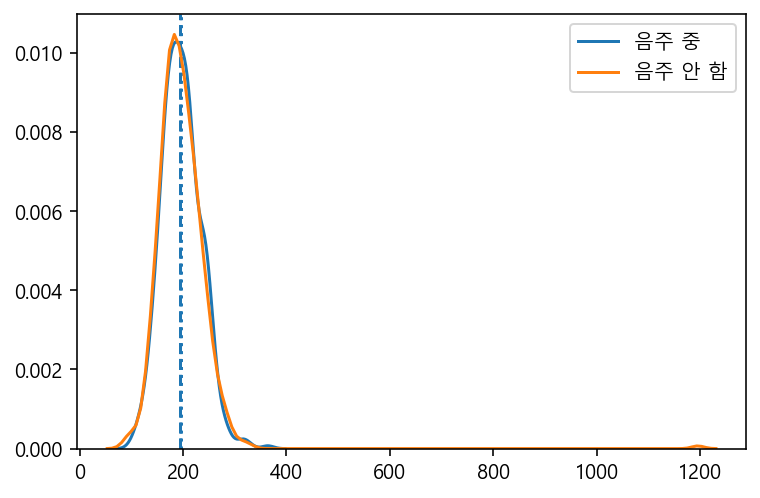

In [63]:
plt.axvline(df_sample["총콜레스테롤"].mean(), linestyle=":")
plt.axvline(df_sample["총콜레스테롤"].median(), linestyle="--")
sns.kdeplot(df_sample.loc[(df_sample["총콜레스테롤"].notnull()) & (df["음주여부"] == "Y"), "총콜레스테롤"], label="음주 중")
sns.kdeplot(df_sample.loc[(df_sample["총콜레스테롤"].notnull()) & (df["음주여부"] == "N"), "총콜레스테롤"], label="음주 안 함")

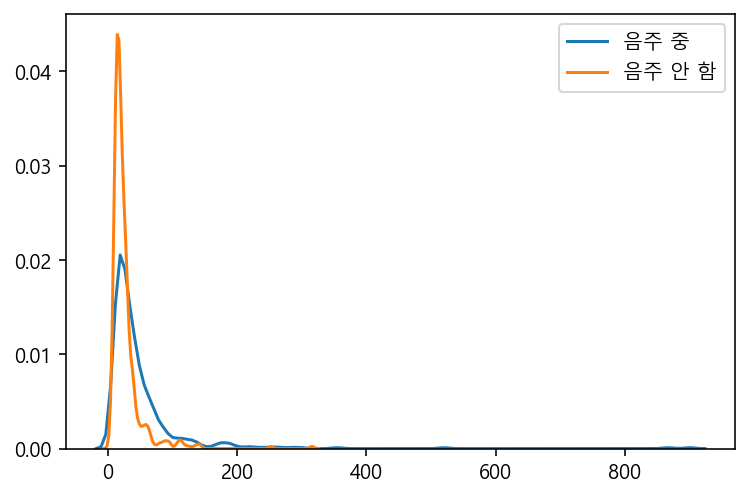

In [64]:
s_1 = df_sample.loc[df_sample["음주여부"] == "Y", "감마지티피"]
s_0 = df_sample.loc[df_sample["음주여부"] == "N", "감마지티피"]

sns.kdeplot(s_1, label="음주 중")
sns.kdeplot(s_0, label="음주 안 함")

## 상관분석

### 상관계수 구하기

In [67]:
columns = [ '연령대코드(5세단위)', '체중(5Kg단위)','신장(5Cm단위)','허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부']

columns

['연령대코드(5세단위)',
 '체중(5Kg단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [70]:
df_small = df_sample[columns]

# corr() : 상관계수 구해주는 메소드 ( Default = 피어슨 상관계수)
df_corr = df_small.corr()

df_corr

,연령대코드(5세단위),체중(5Kg단위),신장(5Cm단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,...,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태
연령대코드(5세단위),1.000000,-0.200336,-0.380239,0.159797,-0.217613,-0.308829,0.233960,0.264549,0.222408,0.091006,...,0.037474,-0.095972,0.008560,-0.178977,0.058702,0.044958,0.129357,-0.009871,-0.015357,-0.121132
체중(5Kg단위),-0.200336,1.000000,0.665067,0.785950,0.122194,0.168929,-0.043727,-0.047717,0.288983,0.324783,...,0.260689,-0.330577,0.043839,0.540191,0.012154,0.170468,0.193976,0.401756,0.246924,0.392874
신장(5Cm단위),-0.380239,0.665067,1.000000,0.312230,0.202426,0.236260,-0.064044,-0.074738,0.063929,0.157810,...,0.135087,-0.207537,0.008146,0.541155,-0.007699,0.212811,0.055783,0.159199,0.185091,0.512294
허리둘레,0.159797,0.785950,0.312230,1.000000,0.017355,0.030809,0.050644,0.073086,0.349219,0.329256,...,0.267643,-0.311478,0.017287,0.377673,0.045948,0.131421,0.253549,0.407063,0.234831,0.246296
시력(좌),-0.217613,0.122194,0.202426,0.017355,1.000000,0.346265,-0.039499,-0.081000,-0.012888,0.027854,...,0.032493,-0.045579,-0.052768,0.142582,-0.024741,0.022175,0.011212,0.080793,0.111903,0.141441
시력(우),-0.308829,0.168929,0.236260,0.030809,0.346265,1.000000,-0.072118,-0.102880,-0.036395,0.001282,...,0.070753,-0.068572,0.003336,0.190303,-0.024977,0.080797,0.003236,0.123455,0.035304,0.089486
청력(좌),0.233960,-0.043727,-0.064044,0.050644,-0.039499,-0.072118,1.000000,0.565295,0.039115,-0.015526,...,0.018695,-0.047898,0.006018,-0.000433,0.041231,0.016792,0.020671,0.044048,-0.025004,0.007413
청력(우),0.264549,-0.047717,-0.074738,0.073086,-0.081000,-0.102880,0.565295,1.000000,0.056661,-0.005658,...,0.034650,-0.069527,-0.032362,-0.050208,0.081749,0.017758,-0.004681,-0.019893,-0.024936,-0.042159
수축기혈압,0.222408,0.288983,0.063929,0.349219,-0.012888,-0.036395,0.039115,0.056661,1.000000,0.751731,...,0.233447,-0.093036,-0.007070,0.169241,0.043110,0.034018,0.133472,0.163762,0.191333,0.094145
이완기혈압,0.091006,0.324783,0.157810,0.329256,0.027854,0.001282,-0.015526,-0.005658,0.751731,1.000000,...,0.225436,-0.091701,0.038887,0.255690,0.035826,0.081965,0.131482,0.191155,0.200150,0.144974


In [81]:
df_corr.loc[df_corr["신장(5Cm단위)"] > 0.3, "신장(5Cm단위)"]

체중(5Kg단위)    0.665067
신장(5Cm단위)    1.000000
허리둘레         0.312230
혈색소          0.541155
흡연상태         0.512294
Name: 신장(5Cm단위), dtype: float64

In [85]:
df_corr["혈색소"].sort_values(ascending=False).head(7)

혈색소           1.000000
신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
흡연상태          0.434467
허리둘레          0.377673
(혈청지오티)ALT    0.331891
이완기혈압         0.255690
Name: 혈색소, dtype: float64

In [86]:
df_corr["감마지티피"].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.531529
(혈청지오티)ALT    0.424481
트리글리세라이드      0.271554
체중(5Kg단위)     0.246924
혈색소           0.245109
허리둘레          0.234831
Name: 감마지티피, dtype: float64

### heatmap

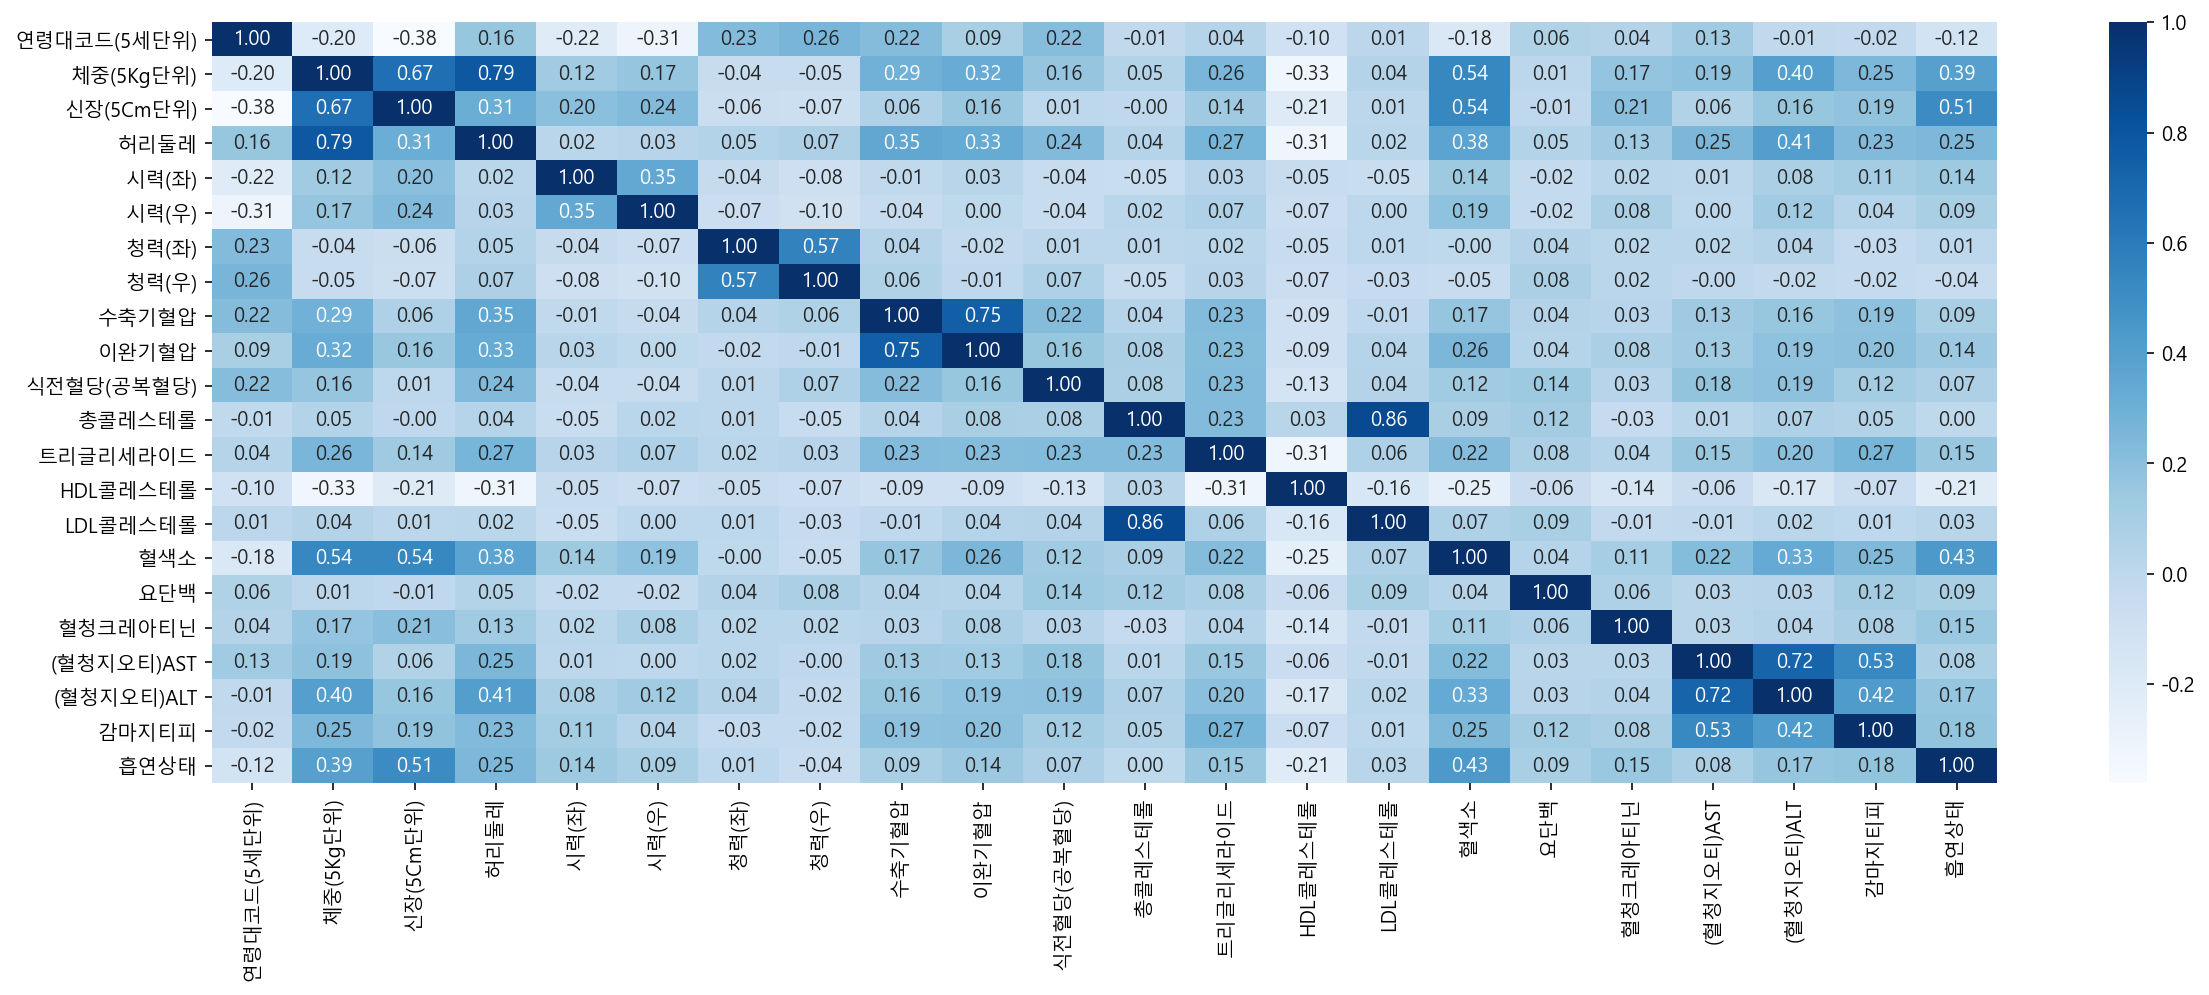

In [92]:
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues")

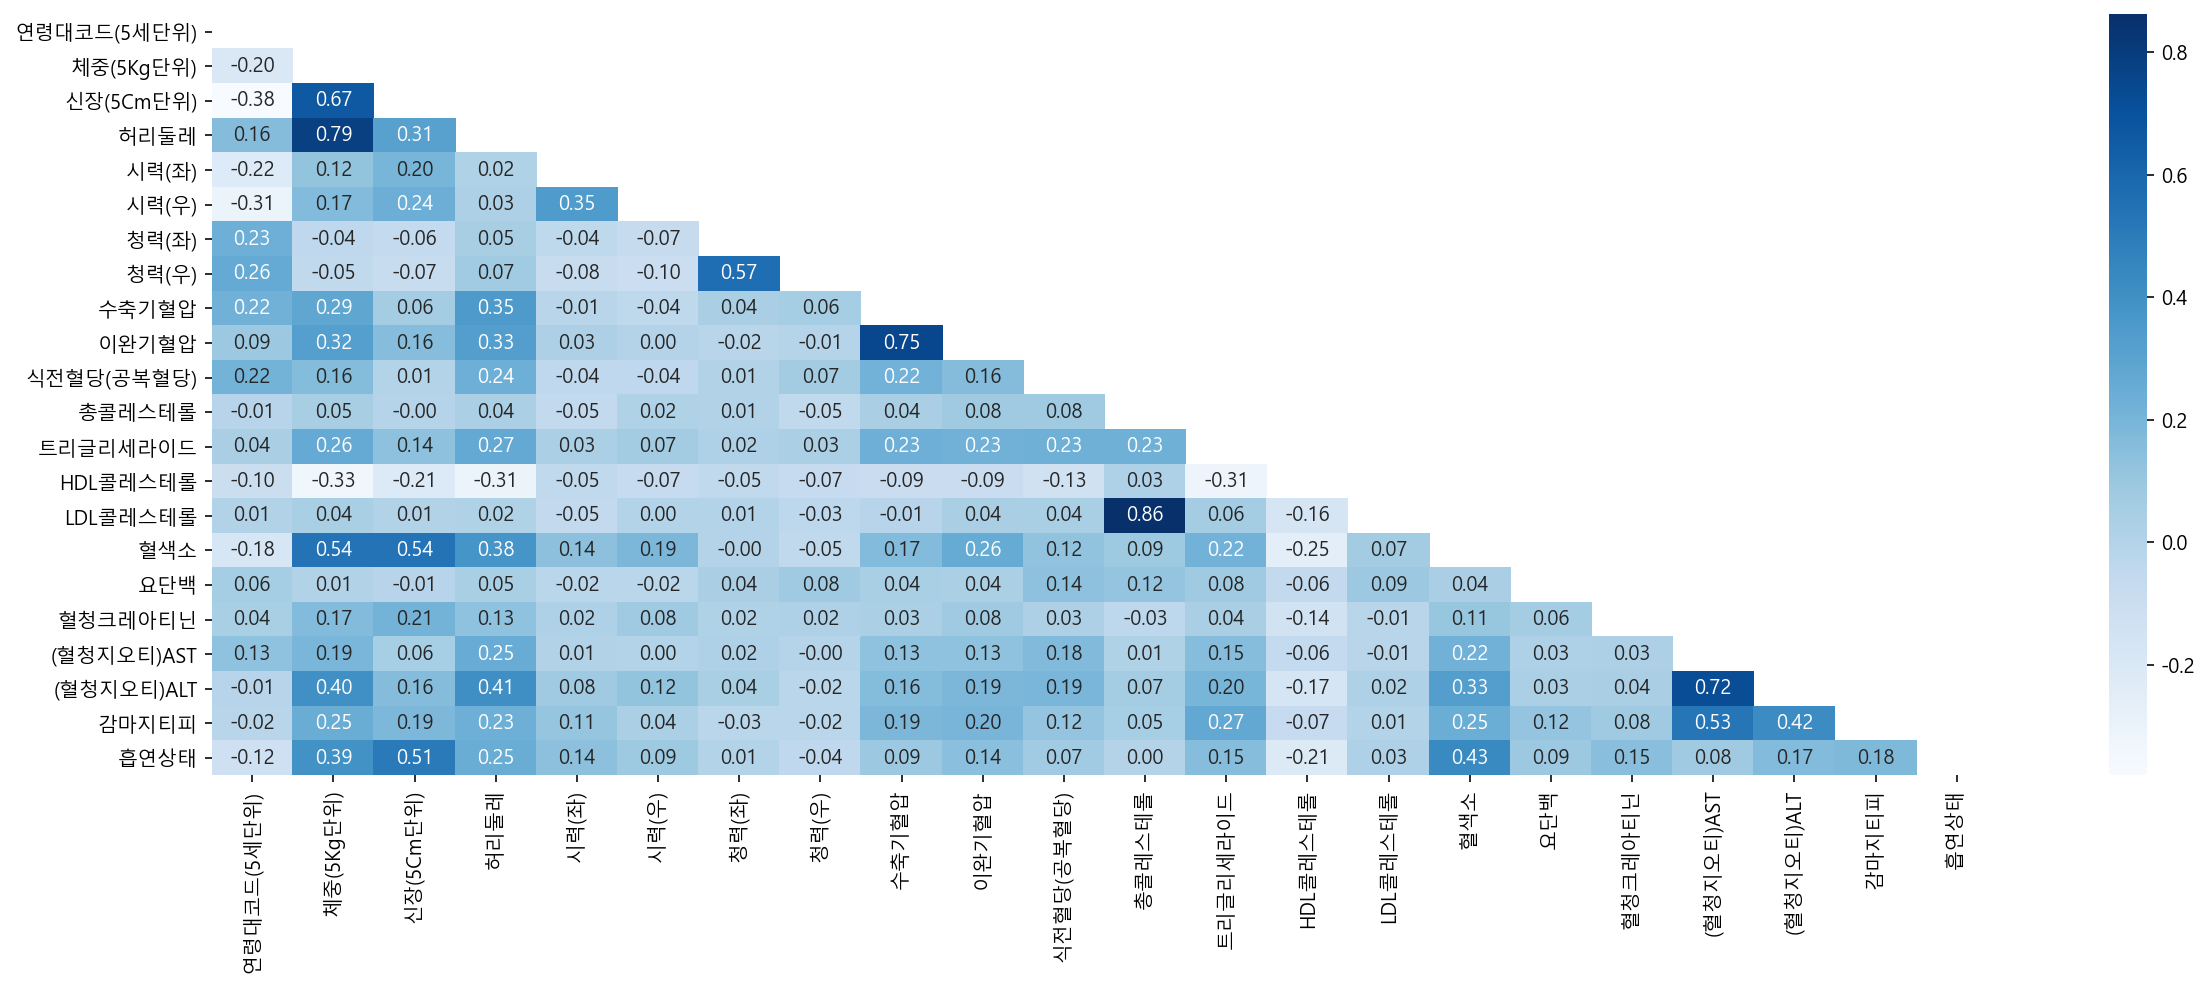

In [94]:
# 공식 홈페이지 참고
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask=mask)

## 결론

* 음주여부에 따라 건강검진 차이가 있다!!
* 신장과 허리 둘레의 크기는 체중과 상관이 있다!!

### 보완점

* 음주여부 Y, N을 1, 0 으로 치환해서 계산하기